<a href="https://colab.research.google.com/github/ken-365/spark/blob/main/spark_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Init setup spark on Google Collab

In [150]:
## connect to Gdrive 
from google.colab import drive
drive.mount('/content/drive')
datapath = "drive/MyDrive/colab/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark
import findspark
findspark.init()

In [152]:
# sparkSession for spark sql
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import functions as F
from pyspark.sql.types import *

In [153]:
spark

# Part 1 Apache Spark? 

Single machines do not have enough power and resources to perform
computations on huge amounts of information.  
A cluster, or group, of computers, pools the resources of
many machines together, giving us the ability to use all the cumulative resources as if they were
a single computer.   
Now, a group of machines alone is not powerful, you need a framework to
coordinate work across them. Spark does just that, *managing and coordinating the execution of
tasks on data across a cluster of computers*.

## Spark architecture

Spark employs a cluster manager that keeps track of the resources available(Spark Applications).

**The cluster manager**  
responsible for maintaining a cluster of physical machines that will
run your Spark Application(s). They are physical machines rather than processes (as they are in Spark)

Spark Applications consist of a *driver process* and a set of *executor processes*.

**The driver process**  
runs your main() function, sits on a node in the cluster, and is responsible for three things:
maintaining information about the Spark Application; responding to a user’s program or input;
and analyzing, distributing, and scheduling work across the executors

**The executors**  
responsible for actually carrying out the work that the driver assigns them.
Which means executing code assigned to it
by the driver, and reporting the state of the computation on that executor back to the driver node.

An action begins the process of
executing that graph of instructions, as a single job, by breaking it down into stages and tasks to
execute across the cluster. The logical structures that we manipulate with transformations and actions
are DataFrames and Datasets. To create a new DataFrame or Dataset, you call a transformation. To
start computation or convert to native language types, you call an action

# Part 4 API overview

## Schemas

A schema defines the column names and types of a DataFrame. You can define schemas
manually or read a schema from a data source (often called schema on read).

### Value type in Python

| API to access or create a data type                                                                            	| Value type in Python                                                                                                                                                                                                                                       	|   	|
|----------------------------------------------------------------------------------------------------------------	|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|---	|
| ByteType()                                                                                                     	| int or long Note: Numbers will be converted to 1-byte signed integer numbers at runtime. Please make sure that numbers are within the range of -128 to 127.                                                                                                	|   	|
| ShortType()                                                                                                    	| int or long Note: Numbers will be converted to 2-byte signed integer numbers at runtime. Please make sure that numbers are within the range of -32768 to 32767.                                                                                            	|   	|
| IntegerType()                                                                                                  	| int or long                                                                                                                                                                                                                                                	|   	|
| LongType()                                                                                                     	| long Note: Numbers will be converted to 8-byte signed integer numbers at runtime. Please make sure that numbers are within the range of -9223372036854775808 to 9223372036854775807.Otherwise, please convert data to decimal.Decimal and use DecimalType. 	|   	|
| FloatType()                                                                                                    	| float Note: Numbers will be converted to 4-byte single-precision floating point numbers at runtime.                                                                                                                                                        	|   	|
| DoubleType()                                                                                                   	| float                                                                                                                                                                                                                                                      	|   	|
| DecimalType()                                                                                                  	| decimal.Decimal                                                                                                                                                                                                                                            	|   	|
| StringType()                                                                                                   	| string                                                                                                                                                                                                                                                     	|   	|
| BinaryType()                                                                                                   	| bytearray                                                                                                                                                                                                                                                  	|   	|
| BooleanType()                                                                                                  	| bool                                                                                                                                                                                                                                                       	|   	|
| TimestampType()                                                                                                	| datetime.datetime                                                                                                                                                                                                                                          	|   	|
| DateType()                                                                                                     	| datetime.date                                                                                                                                                                                                                                              	|   	|
| ArrayType(elementType, [containsNull]) Note:The default value of containsNull is True.                         	| list, tuple, or array                                                                                                                                                                                                                                      	|   	|
| MapType(keyType, valueType, [valueContainsNull]) Note:The default value of valueContainsNull is True.          	| dict                                                                                                                                                                                                                                                       	|   	|
| StructType(fields) Note: fields is a Seq of StructFields. Also, two fields with the same name are not allowed. 	| list or tuple                                                                                                                                                                                                                                              	|   	|
| StructField(name, dataType, [nullable]) Note: The default value of nullable is True.                           	| The value type in Python of the data type of this field (For example, Int for a StructField with the data type IntegerType)                                                                                                                                	|   	|

In [ ]:
# set data type
from pyspark.sql.types import *
b = ByteType()

# Part 5 Overview of Structured API Execution

![image.png](attachment:image.png)

Spark takes queries in DataFrames, Datasets, and SQL and compiles them into RDD transformations. It then performs further
optimizations at runtime, generating native Java bytecode that can remove entire tasks or stages
during execution. Finally the result is returned to the user.

## Structured Operations

In [ ]:
# download sample work data
! git clone https://github.com/databricks/Spark-The-Definitive-Guide.git
! ls -U Spark-The-Definitive-Guide

fatal: destination path 'Spark-The-Definitive-Guide' already exists and is not an empty directory.
data  code  project-templates  license.md  README.md


In [ ]:
datapath = "Spark-The-Definitive-Guide/data/"

In [ ]:
# load json to data frame (schema on read, auto detect data types)
# df = spark.read.format("json").load("data/flight-data/json/2015-summary.json")
df = spark.read.json(datapath+ 'flight-data/json/2015-summary.json')

In [ ]:
%%shell
head -3 "Spark-The-Definitive-Guide/data/flight-data/json/2015-summary.json"

{"ORIGIN_COUNTRY_NAME":"Romania","DEST_COUNTRY_NAME":"United States","count":15}
{"ORIGIN_COUNTRY_NAME":"Croatia","DEST_COUNTRY_NAME":"United States","count":1}
{"ORIGIN_COUNTRY_NAME":"Ireland","DEST_COUNTRY_NAME":"United States","count":344}


In [ ]:
df.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



In [ ]:
# print shape of dataframe : ROW x Column
print((df.count(), len(df.columns)))

(256, 3)


### **View schema**  
A schema is a StructType made up of a number of fields, 
- StructFields, that have a name type 
- Boolean flag which specifies whether that column can contain missing or null values 
- Meta data where users store information about this column

**Then we can use this output schema to create schema when load**

In [ ]:
df.schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

In [ ]:
# create manually schema (schema on write) programmatically
from pyspark.sql.types import StructField, StructType, StringType, LongType
myManualSchema = StructType([
                            StructField("DEST_COUNTRY_NAME", StringType(), True),
                            StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
                            StructField("count", LongType(), False, metadata={"hello":"world"})
                            ])

# df = spark.read.format("json").schema(myManualSchema).load("data/flight-data/json/2015-summary.json")
df = spark.read.json(
    datapath+ 'flight-data/json/2015-summary.json'
    ,schema = myManualSchema
)

In [ ]:
df.schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

In [ ]:
# create schema using DDL langauge
DDLSchema = """
    DEST_COUNTRY_NAME STRING 
    ,ORIGIN_COUNTRY_NAME STRING
    ,count LONG
"""
df_dml = spark.read.json(
    datapath+ 'flight-data/json/2015-summary.json'
    ,schema = DDLSchema
)
df_dml.schema == df.schema

True

### Define and Columns

construct and refer to columns with two simplest ways by using the $col$ or $column$ functions by pass in column name

In [ ]:
# construct column
from pyspark.sql.functions import col, column
col('SomeColumnNme') #or
column('xyz')

Column<b'xyz'>

**Column as expression**  
is a set of transformations on one or more values in a record in a DataFrame.  
In the simplest case, expr("someCol") is equivalent to col("someCol").

In [ ]:
(((col("someCol") + 5) * 200) - 6) < col("otherCol")

Column<b'((((someCol + 5) * 200) - 6) < otherCol)'>

In [ ]:
from pyspark.sql.functions import expr
expr("(((someCol + 5) * 200) - 6) < otherCol")

Column<b'((((someCol + 5) * 200) - 6) < otherCol)'>

**Accessing a DataFrame’s columns**  

In [ ]:
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [ ]:
#or get list of the name of each columns
df.columns

['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count']

### Rows and Records

Spark represents this record as an object of
type Row. Spark manipulates Row objects using column expressions in order to produce usable
values. Row objects internally represent arrays of bytes.

In [ ]:
# calling first row on our DataFrame:
df.first()

Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15)

#### Create Rows

if you create a Row manually, you must specify the values in the same
order as the schema of the DataFrame to which they might be appended

In [ ]:
from pyspark.sql import Row

myRow = Row('Hello',None,1,False) # by position in rows

**Accessing Data in rows**

Specify the position of row to access

In [ ]:
myRow[0],myRow[1],myRow[2]

('Hello', None, 1)

## DataFrame Transformations

### Creating DataFrames

In [ ]:
# read from json
df = spark.read.format('json').load(datapath + '/flight-data/json/2015-summary.json') # schema on the read
#register it as a temporary view so that we can query it with SQL
df.createOrReplaceTempView("dfTable")

In [ ]:
# or create schema and data frame manually
myManualSchema = StructType([ 
                            StructField("some", StringType(), True),  # column name, type, can contain None
                            StructField("col", StringType(), True),
                            StructField("names", LongType(), False)
                            ])
myRow = Row('Hello',None,1)
myDf = spark.createDataFrame([myRow], myManualSchema)
myDf.show()

+-----+----+-----+
| some| col|names|
+-----+----+-----+
|Hello|null|    1|
+-----+----+-----+



### select and selectExpr

In [ ]:
# multiple ways to select column in Spark DataFrame
df = spark.range(30).toDF('number') # create spark DataFrame from range

# below code have the same result
# select col
df.select(F.col('number') + 10).show(2)
# F.expr
df.select(F.expr('number + 10')).show(2)
# panda liked
df.select(df['number'] + 10).show(2)
df.select(df.number + 10).show(2)
# selectExpr
df.selectExpr('number + 10').show(2)

+-------------+
|(number + 10)|
+-------------+
|           10|
|           11|
+-------------+
only showing top 2 rows



In [ ]:
df.show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
+-----------------+-------------------+-----+
only showing top 3 rows



In [ ]:
# select(column name) == SQL (SELECT * FROM DEST_COUNTRY_NAME LIMIT 2)
df.select('Dest_country_name').show(2) 

+-----------------+
|Dest_country_name|
+-----------------+
|    United States|
|    United States|
+-----------------+
only showing top 2 rows



In [ ]:
# select multiple columns
df.select('Dest_country_name','count').show(3)

+-----------------+-----+
|Dest_country_name|count|
+-----------------+-----+
|    United States|   15|
|    United States|    1|
|    United States|  344|
+-----------------+-----+
only showing top 3 rows



In [ ]:
# Use interchangeably between expr(),col(),column() is equivalent
df.select(expr('Dest_country_name'),
          col('Dest_country_name'),
          column('Dest_country_name')).show(2)

+-----------------+-----------------+-----------------+
|Dest_country_name|Dest_country_name|Dest_country_name|
+-----------------+-----------------+-----------------+
|    United States|    United States|    United States|
|    United States|    United States|    United States|
+-----------------+-----------------+-----------------+
only showing top 2 rows



In [ ]:
# expr() is the most flexible (can change column name) using as  == SELECT DEST_COUNTRY_NAME as Destination FROM dfTable LIMIT 2
df.select(
        expr('Dest_country_name AS Destination')
        ).show(2)

+-------------+
|  Destination|
+-------------+
|United States|
|United States|
+-------------+
only showing top 2 rows



In [ ]:
# or use alias to change name. This will overwrite as
df.select(expr("DEST_COUNTRY_NAME as destination").alias("To"),
         expr('ORIGIN_COUNTRY_NAME').alias('FROM')).show(2)

+-------------+-------+
|           To|   FROM|
+-------------+-------+
|United States|Romania|
|United States|Croatia|
+-------------+-------+
only showing top 2 rows



Simple example that
adds a new column withinCountry to our DataFrame that specifies whether the destination and
origin are the same:

In [ ]:
# expression to check origin == destination
df.select(F.expr('DEST_COUNTRY_NAME == ORIGIN_COUNTRY_NAME').alias('Is travel within same country')).show(3)

+-----------------------------+
|Is travel within same country|
+-----------------------------+
|                        false|
|                        false|
|                        false|
+-----------------------------+
only showing top 3 rows



In [ ]:
# using selectExpr
df.selectExpr('DEST_COUNTRY_NAME == ORIGIN_COUNTRY_NAME AS Is_same' ).show(3)

+-------+
|Is_same|
+-------+
|  false|
|  false|
|  false|
+-------+
only showing top 3 rows



In [ ]:
# return all(*) + check
df.selectExpr("*", # all original columns
                "(DEST_COUNTRY_NAME == ORIGIN_COUNTRY_NAME) as withinCountry").show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [ ]:
#using withcolumn
df.withColumn('withinCountry', F.col("DEST_COUNTRY_NAME") == F.col("ORIGIN_COUNTRY_NAME")).show(2)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
+-----------------+-------------------+-----+-------------+
only showing top 2 rows



In [ ]:
# aggregation
df.selectExpr('count(distinct(DEST_COUNTRY_NAME)) as total_country', 'avg(count) as count_average').show(2)

+-------------+-------------+
|total_country|count_average|
+-------------+-------------+
|          132|  1770.765625|
+-------------+-------------+



### Converting to Spark Types (Literals)

To pass explicit values into Spark that are just a value for all the rows.  
This will come up when you might need to check whether a value is greater than some constant
or other programmatically created variable.

In [ ]:
from pyspark.sql.functions import lit # lit for all rows
# use select
df.select(expr("*"), lit(1).alias("One")).show(3) # == SELECT *, 1 as One FROM dfTable LIMIT 3

+-----------------+-------------------+-----+---+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|One|
+-----------------+-------------------+-----+---+
|    United States|            Romania|   15|  1|
|    United States|            Croatia|    1|  1|
|    United States|            Ireland|  344|  1|
+-----------------+-------------------+-----+---+
only showing top 3 rows



### Adding Columns
using the
$withColumn$ method on our DataFrame.  
Remember that this is just result from query and not able to modify original dataframe

In [ ]:
df.withColumn('One',lit(1)).show(2) # return all column plus new adds

+-----------------+-------------------+-----+---+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|One|
+-----------------+-------------------+-----+---+
|    United States|            Romania|   15|  1|
|    United States|            Croatia|    1|  1|
+-----------------+-------------------+-----+---+
only showing top 2 rows



### Renaming Columns
use the $withColumnRenamed$ method

In [ ]:
df.withColumnRenamed('DEST_COUNTRY_NAME','new name').show(1)

+-------------+-------------------+-----+
|     new name|ORIGIN_COUNTRY_NAME|count|
+-------------+-------------------+-----+
|United States|            Romania|   15|
+-------------+-------------------+-----+
only showing top 1 row



### Reserved Characters and Keywords

using backtick ( \` ) when come across any reserved characters like spaces or dashes in column
names when referencing a column in an expression

In [ ]:
# new column with space
dfWithLongColName = df.withColumn(
                                "This Long Column-Name", # no need back tick cause not expression
                                F.expr("ORIGIN_COUNTRY_NAME"))

In [ ]:
dfWithLongColName.selectExpr(
"`This Long Column-Name`", # when ref name with space alway put backtick ` in
"`This Long Column-Name` as `new col`").show(2)

+---------------------+-------+
|This Long Column-Name|new col|
+---------------------+-------+
|              Romania|Romania|
|              Croatia|Croatia|
+---------------------+-------+
only showing top 2 rows



In [ ]:
dfWithLongColName.createOrReplaceTempView("dfTableLong")

In [ ]:
# need back tick( `) in expression
dfWithLongColName.select(expr("`This Long Column-Name`")).show(1)

+---------------------+
|This Long Column-Name|
+---------------------+
|              Romania|
+---------------------+
only showing top 1 row



In [ ]:
# no need when select
dfWithLongColName.select('This Long Column-Name').show(1)

+---------------------+
|This Long Column-Name|
+---------------------+
|              Romania|
+---------------------+
only showing top 1 row



### Removing Columns

In [ ]:
df.drop("ORIGIN_COUNTRY_NAME").columns

['DEST_COUNTRY_NAME', 'count']

In [ ]:
# drop multiple columns
dfWithLongColName.drop("ORIGIN_COUNTRY_NAME", "DEST_COUNTRY_NAME").columns

['count', 'This Long Column-Name']

### Changing a Column’s Type (cast)

Lets convert our count column from
an integer to a type Long:

In [ ]:
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [ ]:
df.withColumn("count2", F.col("count").cast("string")).printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)
 |-- count2: string (nullable = true)



### Filtering Rows

In [ ]:
df.where('count < 2').show(2) # ==SELECT * FROM dfTable WHERE count < 2 LIMIT 2
df.filter("count <2").show(2) # filter and count use interchangebly

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [ ]:
# chain filter
df.where('count < 2').where('ORIGIN_COUNTRY_NAME == "Croatia"').show()
# same thing with below
# df.where(col("count") < 2).where(col("ORIGIN_COUNTRY_NAME") != "Croatia").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+



### Getting Unique Rows (distinct)

In [ ]:
df.select(F.col("ORIGIN_COUNTRY_NAME")).distinct().show(3)
# same with
spark.sql("SELECT  DISTINCT(ORIGIN_COUNTRY_NAME) FROM dftable limit 3").show(3)

+-------------------+
|ORIGIN_COUNTRY_NAME|
+-------------------+
|           Paraguay|
|             Russia|
|           Anguilla|
+-------------------+
only showing top 3 rows

+-------------------+
|ORIGIN_COUNTRY_NAME|
+-------------------+
|           Paraguay|
|             Russia|
|           Anguilla|
+-------------------+



### Random Samples and Splits
Random splits can be helpful when you need to break up your DataFrame into a random “splits”
of the original DataFrame.

In [ ]:
seed = 5
df.sample(withReplacement= False, fraction=0.4, seed = seed).show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 3 rows



In [ ]:
seed = 99
dataFrames = df.randomSplit([0.25, 0.75], seed) # set weight
dataFrames[0].count() > dataFrames[1].count() # 2 splits in a list called dataFrames

False

### Concatenating and Appending Rows (Union)
must be sure that they have the same schema and
number of columns; otherwise, the union will fail.

In [ ]:
from pyspark.sql import Row
schema = df.schema
newRows = [Row("New Country", "Other Country", 1),
            Row("New Country 2", "Other Country 3", 1)]
parallelizedRows = spark.sparkContext.parallelize(newRows)
newDF = spark.createDataFrame(parallelizedRows, schema)
# Union
df.union(newDF)\
.where("count = 1")\
.where(col("ORIGIN_COUNTRY_NAME") != "United States")\
.show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|    United States|          Gibraltar|    1|
|    United States|             Cyprus|    1|
|    United States|            Estonia|    1|
|    United States|          Lithuania|    1|
|    United States|           Bulgaria|    1|
|    United States|            Georgia|    1|
|    United States|            Bahrain|    1|
|    United States|   Papua New Guinea|    1|
|    United States|         Montenegro|    1|
|    United States|            Namibia|    1|
|      New Country|      Other Country|    1|
|    New Country 2|    Other Country 3|    1|
+-----------------+-------------------+-----+



### Sorting Rows

In [ ]:
df.sort('count',ascending=False).show(3)
df.orderBy("count", "DEST_COUNTRY_NAME").show(3)

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|             Canada|  8483|
|           Canada|      United States|  8399|
+-----------------+-------------------+------+
only showing top 3 rows

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
|           Cyprus|      United States|    1|
+-----------------+-------------------+-----+
only showing top 3 rows



In [ ]:
from pyspark.sql.functions import desc, asc
df.orderBy(expr("count desc"),expr('DEST_COUNTRY_NAME asc')).show(2)
df.orderBy(col("count").desc(), col("DEST_COUNTRY_NAME").asc()).show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|     Burkina Faso|      United States|    1|
|    Cote d'Ivoire|      United States|    1|
+-----------------+-------------------+-----+
only showing top 2 rows

+-----------------+-------------------+------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME| count|
+-----------------+-------------------+------+
|    United States|      United States|370002|
|    United States|             Canada|  8483|
+-----------------+-------------------+------+
only showing top 2 rows



### Repartition and Coalesce
Another important optimization opportunity is to partition the data according to some frequently
filtered columns, which control the physical layout of data across the cluster including the
partitioning scheme and the number of partitions.

Repartition will incur a full shuffle of the data, regardless of whether one is necessary. This
means that you should typically only repartition when the future number of partitions is greater
than your current number of partitions or when you are looking to partition by a set of columns

In [ ]:
# get the numbe of current partition
df.rdd.getNumPartitions() # 1

1

In [ ]:
# partition to five 
df.repartition(5).rdd.getNumPartitions()

5

If you know that you’re going to be filtering by a certain column often, it can be worth
repartitioning based on that column:

In [ ]:
df.repartition(5, F.col("DEST_COUNTRY_NAME"))

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

Coalesce, on the other hand, will not incur a full shuffle and will try to combine partitions. This
operation will shuffle your data into five partitions based on the destination country name, and
then coalesce them (without a full shuffle):

In [ ]:
df.repartition(5, col("DEST_COUNTRY_NAME")).coalesce(2)

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

### Collecting Rows to the Driver (to local machine)
There are
times when you’ll want to collect some of your data to the driver in order to manipulate it on
your **local machine.**

$collect()$ gets all data from the entire DataFrame  
$take()$ selects the first N rows  
$show()$ prints out a number of rows nicely.

In [ ]:
collectDF = df.limit(10)
collectDF.take(5) # take works with an Integer count

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [ ]:
collectDF.show(5,  truncate=False)
#######
collectDF.collect()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |15   |
|United States    |Croatia            |1    |
|United States    |Ireland            |344  |
|Egypt            |United States      |15   |
|United States    |India              |62   |
+-----------------+-------------------+-----+
only showing top 5 rows



[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Grenada', count=62),
 Row(DEST_COUNTRY_NAME='Costa Rica', ORIGIN_COUNTRY_NAME='United States', count=588),
 Row(DEST_COUNTRY_NAME='Senegal', ORIGIN_COUNTRY_NAME='United States', count=40),
 Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1)]

# Part 6. Working with Different Types of Data

Resources fro Spark API doc
- DataFrame(Dataset) [Link](http://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.Dataset)
    - DataFrameStatFunctions :Stat related functions [Link](http://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.DataFrameStatFunctions)
    - DataFrameNaFunctions :when working with null data [Link](http://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.DataFrameNaFunctions)
- Column Method: like alias/ contain
[Link](http://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.Column)
- spark.sql.functions  [Link](http://spark.apache.org/docs/latest/api/scala/index.html#org.apache.spark.sql.functions$)

In [ ]:
# read sample dataframe
# df = spark.read.format("csv")\
# .option('header','true')\
# .option('inferSchema','true')\
# .load("data/retail-data/by-day/2010-12-01.csv")

df = spark.read.csv( 
    datapath + 'retail-data/by-day/2010-12-01.csv'
    ,header=  True
    ,inferSchema = True
)

df.printSchema()
df.createOrReplaceTempView("dfTable")

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
df.selectExpr('*').show(3)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 3 rows



## Booleans
specify equality as well as
less-than or greater-than:
Boolean statements consist of four elements: *and*, *or*, *true*, and *false*

### AND operation
The reason for this is that even if Boolean statements are expressed serially (one after the other),
Spark will flatten all of these filters into one statement and perform the filter at the same time,
creating the and statement for us.

In [ ]:
# boolean as a filter
df.where(col('InvoiceNo') == 536365).where(col('UnitPrice') == 2.55)\ # Filter
.select(col('InvoiceNo').alias('Number_of_Invoice'),col('UnitPrice'),col('Quantity'))\ # select columns
.show(5,False) # False  == no truncate column

+-----------------+---------+--------+
|Number_of_Invoice|UnitPrice|Quantity|
+-----------------+---------+--------+
|536365           |2.55     |6       |
+-----------------+---------+--------+



In [ ]:
# or specify in expression  
df.where('InvoiceNo == 536365').where('UnitPrice == 2.55')\
.selectExpr('InvoiceNo as NUmber_of_Invoice','UnitPrice','Quantity')\
.show(5,False)

+-----------------+---------+--------+
|NUmber_of_Invoice|UnitPrice|Quantity|
+-----------------+---------+--------+
|536365           |2.55     |6       |
+-----------------+---------+--------+



In [ ]:
# You can also using & instead of serialize operation
df.where(
    (F.col('InvoiceNo') == 536365) & (F.col('UnitPrice') == 2.55)
).selectExpr('InvoiceNo as NUmber_of_Invoice','UnitPrice','Quantity')\
.show(5,False)

+-----------------+---------+--------+
|NUmber_of_Invoice|UnitPrice|Quantity|
+-----------------+---------+--------+
|536365           |2.55     |6       |
+-----------------+---------+--------+



### OR operation
OR need to have separate variable to store filter rules


```
use |
```



In [ ]:
from pyspark.sql.functions import instr # == number of position in the string
# create filter
price_filter = col('UnitPrice') > 600
description_filter = instr(df['Description'],'POSTAGE') >= 1 # Postage is not the first word in the description

df.where(df.StockCode.isin('DOT'))\ # have word 'DOT' in StockCode 
.where(price_filter | description_filter).show()

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



To filter a DataFrame, you can also just
specify a Boolean column:


In [ ]:
# Sample query with boolean column in SQL
# create temp view for quary in sql
df.createOrReplaceTempView('SQL_table1')
spark.sql('''
SELECT *, (StockCode = 'DOT' AND  
    (UnitPrice > 600 OR instr(Description, "POSTAGE") >= 1)) as isExpensive  
FROM dfTable  
WHERE (StockCode = 'DOT' AND (UnitPrice > 600 OR instr(Description, "POSTAGE") >= 1))
''').show()

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|isExpensive|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|       true|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|       true|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+



In [ ]:
# can also be done in data frame like
# init filter
price_filter = col('UnitPrice') > 600
description_filter = instr(df['Description'],'POSTAGE') >= 1 
dot_filter = df.StockCode.isin('DOT')
# query
df.where(dot_filter).where(price_filter | description_filter)\
.select(col('*'),(dot_filter & dot_filter | description_filter).alias('isExpensive'))\
.show()

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|isExpensive|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|       true|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|       true|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+



In [ ]:
# or use withColumn to add new column
df.withColumn("isExpensive", dot_filter  & (price_filter | description_filter))\ # add true and false base on condition
.where("isExpensive")\ # filter only true
.show(5)

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|isExpensive|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|       true|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|       true|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+-----------+



## Numbers

Manipulate number with df functions  
For example try $(Quantity * UnitPrice)^2 +5$

In [ ]:
square_quantity = pow(col('Quantity') * col('UnitPrice'),2) +5
df.select(expr('CustomerID'),square_quantity.alias('revenue'))\
.show(3)

+----------+------------------+
|CustomerID|           revenue|
+----------+------------------+
|   17850.0|239.08999999999997|
|   17850.0|          418.7156|
|   17850.0|             489.0|
+----------+------------------+
only showing top 3 rows



In [ ]:
# in expression
df.selectExpr('CustomerID',
             'POWER((Quantity * UnitPrice),2.0) +5 as revenue').show(3) # POWER is SQL function that can use in expression

+----------+------------------+
|CustomerID|           revenue|
+----------+------------------+
|   17850.0|239.08999999999997|
|   17850.0|          418.7156|
|   17850.0|             489.0|
+----------+------------------+
only showing top 3 rows



In [ ]:
# inSQL
spark.sql('''
SELECT CustomerID, POWER((Quantity * UnitPrice),2.0) +5 as revenue
FROM SQL_table1 ''').show(3)

+----------+------------------+
|CustomerID|           revenue|
+----------+------------------+
|   17850.0|239.08999999999997|
|   17850.0|          418.7156|
|   17850.0|             489.0|
+----------+------------------+
only showing top 3 rows



Rounding up with round and round down with bround

In [ ]:
from pyspark.sql.functions import lit, round, bround
df.select(round(lit("2.5")), bround(lit("2.5"))).show(2)

+-------------+--------------+
|round(2.5, 0)|bround(2.5, 0)|
+-------------+--------------+
|          3.0|           2.0|
|          3.0|           2.0|
+-------------+--------------+
only showing top 2 rows



compute the correlation of two columns using stat methods

In [ ]:
# Using stat method
df.stat.corr('Quantity','UnitPrice')

-0.04112314436835551

In [ ]:
# in query
from pyspark.sql.functions import corr
df.select(corr("Quantity", "UnitPrice")).show()

+-------------------------+
|corr(Quantity, UnitPrice)|
+-------------------------+
|     -0.04112314436835551|
+-------------------------+



### Compute statistics (using describe())
[link text](https://)compute summary statistics for a column or set of columns

In [ ]:
df.describe().show()

+-------+-----------------+------------------+--------------------+------------------+-------------------+------------------+------------------+--------------+
|summary|        InvoiceNo|         StockCode|         Description|          Quantity|        InvoiceDate|         UnitPrice|        CustomerID|       Country|
+-------+-----------------+------------------+--------------------+------------------+-------------------+------------------+------------------+--------------+
|  count|             3108|              3108|                3098|              3108|               3108|              3108|              1968|          3108|
|   mean| 536516.684944841|27834.304044117645|                null| 8.627413127413128|               null| 4.151946589446603|15661.388719512195|          null|
| stddev|72.89447869788873|17407.897548583845|                null|26.371821677029203|               null|15.638659854603892|1854.4496996893627|          null|
|    min|           536365|             

In [ ]:
# or compute with these functions
from pyspark.sql.functions import count, mean, stddev_pop, min, max

calculate either exact or
approximate quantiles of your data using the approxQuantile method:

In [ ]:
colName = 'UnitPrice'
quantileProbs = [0.5]
relError = 0.05
df.stat.approxQuantile('UnitPrice',quantileProbs,relError)

[2.51]

### Generate ROW number (running number)
we can also add a unique ID to each row by using the function
monotonically_increasing_id. This function generates a unique value for each row, starting
with 0:

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
df.select(col('CustomerID'),monotonically_increasing_id()).show(2)

+----------+-----------------------------+
|CustomerID|monotonically_increasing_id()|
+----------+-----------------------------+
|   17850.0|                            0|
|   17850.0|                            1|
+----------+-----------------------------+
only showing top 2 rows



## Strings


initcap sets the first letter of each word in uppercase, all other letters in lowercase.

In [ ]:
from pyspark.sql.functions import initcap
df.select(initcap(col('Country'))).show(2)

+----------------+
|initcap(Country)|
+----------------+
|  United Kingdom|
|  United Kingdom|
+----------------+
only showing top 2 rows



Making all strings uppercase or lower case

In [ ]:
from pyspark.sql.functions import upper, lower
df.select(col('Country'),upper(col('Country')),lower(col('Country'))).show(2)

+--------------+--------------+--------------+
|       Country|upper(Country)|lower(Country)|
+--------------+--------------+--------------+
|United Kingdom|UNITED KINGDOM|united kingdom|
|United Kingdom|UNITED KINGDOM|united kingdom|
+--------------+--------------+--------------+
only showing top 2 rows



adding or removing spaces around a string. You can do this by using lpad,
ltrim, rpad and rtrim, trim:

In [ ]:
from pyspark.sql.functions import lit, ltrim, rtrim, rpad, lpad, trim
df.select(
ltrim(lit(" HELLO ")).alias("ltrim"),
rtrim(lit(" HELLO ")).alias("rtrim"),
trim(lit(" HELLO ")).alias("trim"),
lpad(lit("HELLO"), 3, "*").alias("lp"), # padding the left side of a string with a specific set of characters.
rpad(lit("HELLO"), 10, "*").alias("rp")).show(2) # padding the right side of a string with a specific set of characters.

+------+------+-----+---+----------+
| ltrim| rtrim| trim| lp|        rp|
+------+------+-----+---+----------+
|HELLO | HELLO|HELLO|HEL|HELLO*****|
|HELLO | HELLO|HELLO|HEL|HELLO*****|
+------+------+-----+---+----------+
only showing top 2 rows



### Regular Expression

There are two key functions in Spark that you’ll need in
order to perform regular expression tasks: regexp_extract and regexp_replace. These
functions extract values and replace values, respectively.

Let’s explore how to use the regexp_replace function to replace substitute color names in our
description column:

In [ ]:
df.show(3)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 3 rows



In [ ]:
from pyspark.sql.functions import regexp_replace, regexp_extract, col
# replace any words in description that match word in strings to COLOR
strings= "(BLACK|WHITE|RED|GREEN|BLUE)" # replace any of this
df.select(regexp_replace(col('Description'),strings,'COLOR').alias('color_clean'), 
            col('Description')).show(2,False)

+----------------------------------+----------------------------------+
|color_clean                       |Description                       |
+----------------------------------+----------------------------------+
|COLOR HANGING HEART T-LIGHT HOLDER|WHITE HANGING HEART T-LIGHT HOLDER|
|COLOR METAL LANTERN               |WHITE METAL LANTERN               |
+----------------------------------+----------------------------------+
only showing top 2 rows



Another task might be to replace given characters with other characters using translate Building this as a
regular expression could be tedious, so Spark also provides the translate function to replace these
values.  
This is done character by character 'ABCD' , '1234' mean replace A with 1 and replace B with 2 and so on..

In [ ]:
from pyspark.sql.functions import translate
df.select(translate(col('Description'),'ABCD','1234'),'Description').show(2,False)

+----------------------------------+----------------------------------+
|translate(Description, ABCD, 1234)|Description                       |
+----------------------------------+----------------------------------+
|WHITE H1NGING HE1RT T-LIGHT HOL4ER|WHITE HANGING HEART T-LIGHT HOLDER|
|WHITE MET1L L1NTERN               |WHITE METAL LANTERN               |
+----------------------------------+----------------------------------+
only showing top 2 rows



pulling out the first mentioned color using regexp_extract

In [ ]:
extract_str = "(BLACK|WHITE|RED|GREEN|BLUE)" # pull out any of this
df.select(
regexp_extract(col("Description"), extract_str, 1).alias("color_clean"),
col("Description")).show(2,False)

+-----------+----------------------------------+
|color_clean|Description                       |
+-----------+----------------------------------+
|WHITE      |WHITE HANGING HEART T-LIGHT HOLDER|
|WHITE      |WHITE METAL LANTERN               |
+-----------+----------------------------------+
only showing top 2 rows



check for their existence. We can do
this with the contains method on each column.

In [ ]:
# create column to check has black or white then use boolean result to filter 
from pyspark.sql.functions import instr
containsBlack = instr(col("Description"), "BLACK") >= 1
containsWhite = instr(col("Description"), "WHITE") >= 1
df.withColumn("hasSimpleColor", containsBlack | containsWhite)\
.where("hasSimpleColor")\
.select(col("Description"),col("hasSimpleColor")).show(3, False)

+----------------------------------+--------------+
|Description                       |hasSimpleColor|
+----------------------------------+--------------+
|WHITE HANGING HEART T-LIGHT HOLDER|true          |
|WHITE METAL LANTERN               |true          |
|RED WOOLLY HOTTIE WHITE HEART.    |true          |
+----------------------------------+--------------+
only showing top 3 rows



What about 3 or more values  
we’re going to use a different function,
locate, that returns the integer location (1 based location). We then convert that to a Boolean
before using it as the same basic feature:

In [ ]:
from pyspark.sql.functions import  locate
simpleColors = ["black", "white", "red", "green", "blue"]
def color_locator(column, color_string):
  return locate(color_string.upper(), column).cast("boolean").alias("is_" + color_string)

selectedColumns = [color_locator(df.Description, c) for c in simpleColors]
selectedColumns.append(expr("*")) # has to a be Column type

df.select(*selectedColumns).where(expr("is_white OR is_red"))\
  .select("Description").show(3, False)

+----------------------------------+
|Description                       |
+----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER|
|WHITE METAL LANTERN               |
|RED WOOLLY HOTTIE WHITE HEART.    |
+----------------------------------+
only showing top 3 rows



## Dates and Timestamps

There
are dates, which focus exclusively on calendar dates, and timestamps, which include both date
and time information.

Let’s begin with the basics and get the current date and the current
timestamps:

In [ ]:
from pyspark.sql.functions import current_date,current_timestamp
dateDF = spark.range(10)\
.withColumn('today',current_date())\
.withColumn('now',current_timestamp())

dateDF.printSchema()

root
 |-- id: long (nullable = false)
 |-- today: date (nullable = false)
 |-- now: timestamp (nullable = false)



In [ ]:
dateDF.show(3,False)

+---+----------+-----------------------+
|id |today     |now                    |
+---+----------+-----------------------+
|0  |2021-11-13|2021-11-13 21:38:13.754|
|1  |2021-11-13|2021-11-13 21:38:13.754|
|2  |2021-11-13|2021-11-13 21:38:13.754|
+---+----------+-----------------------+
only showing top 3 rows



let’s add and subtract days from today.
These functions take a column and then the number of days to either add or subtract as the
arguments:

In [ ]:
from pyspark.sql.functions import date_add,date_sub
dateDF.select('id','today',date_add(dateDF.today,5), date_sub(dateDF.today,9))\
.show(3,False)

+---+----------+------------------+------------------+
|id |today     |date_add(today, 5)|date_sub(today, 9)|
+---+----------+------------------+------------------+
|0  |2021-11-13|2021-11-18        |2021-11-04        |
|1  |2021-11-13|2021-11-18        |2021-11-04        |
|2  |2021-11-13|2021-11-18        |2021-11-04        |
+---+----------+------------------+------------------+
only showing top 3 rows



Another common task is to take a look at the difference between two dates. We can do this with
the datediff function that will return the number of days in between two dates

In [ ]:
from pyspark.sql.functions import datediff
dateDF.withColumn('week_ago', date_sub(col('today'),7))\
.select('today','week_ago',datediff(col('today'),col('week_ago'))).show(3)

+----------+----------+-------------------------+
|     today|  week_ago|datediff(today, week_ago)|
+----------+----------+-------------------------+
|2020-05-10|2020-05-03|                        7|
|2020-05-10|2020-05-03|                        7|
|2020-05-10|2020-05-03|                        7|
+----------+----------+-------------------------+
only showing top 3 rows



The to_date function allows
you to convert a string to a date, optionally with a specified forma

In [ ]:
from pyspark.sql.functions import to_date
spark.range(5).withColumn('date',lit('2020-01-01'))\
.select(to_date(col('date')).alias('Cast_string_to_date')).printSchema()

root
 |-- Cast_string_to_date: date (nullable = true)



In [ ]:
# if Spark cannot parse the date; it will just return null.
# format should be year-month-day -> month 20 is error and return null
dateDF.select(to_date(lit("2016-20-12")),to_date(lit("2017-12-11"))).show(1)

+---------------------+---------------------+
|to_date('2016-20-12')|to_date('2017-12-11')|
+---------------------+---------------------+
|                 null|           2017-12-11|
+---------------------+---------------------+
only showing top 1 row



Let’s fix this pipeline, step by step, and come up with a robust way to avoid these issues entirely.
The first step is to remember that we need to specify our date format according to the Java
SimpleDateFormat standard. (year - month - date)

We will use two functions to fix this: to_date and to_timestamp. The former optionally
expects a format, whereas the latter requires one:

In [ ]:
# if the data comes in year -date- month, we must specify format explicitly
dateFormat = 'yyyy-dd-MM'
cleanDateDF = spark.range(1).select(
                        to_date(lit('2017-12-11'), dateFormat).alias('date1'), # yyyy-dd-MM to yyyy-MM-dd
                        to_date(lit('2017-20-05'), dateFormat).alias('date2')
).show(3)

+----------+----------+
|     date1|     date2|
+----------+----------+
|2017-11-12|2017-05-20|
+----------+----------+



In [ ]:
# time stamp always require format to specify
from pyspark.sql.functions import to_timestamp
dateDF.select(col('today'),to_timestamp(col('today'),dateFormat)).show(3)

+----------+-----------------------------------+
|     today|to_timestamp(`today`, 'yyyy-dd-MM')|
+----------+-----------------------------------+
|2020-05-10|                2020-05-10 00:00:00|
|2020-05-10|                2020-05-10 00:00:00|
|2020-05-10|                2020-05-10 00:00:00|
+----------+-----------------------------------+
only showing top 3 rows



## Working with Nulls in Data
There are two things you can do with null values: you can explicitly drop nulls or you can fill
them with a value (globally or on a per-column basis).

#### Coalesce
Returns the value from the first column that is not null. If first column is null then return second and so on



In [ ]:
cDf = spark.createDataFrame([(None, None,'James'), (8, 5,'Peak'), (None, 2,'High')], ("a", "b",'c'))
cDf.show()

+----+----+-----+
|   a|   b|    c|
+----+----+-----+
|null|null|James|
|   8|   5| Peak|
|null|   2| High|
+----+----+-----+



In [ ]:
cDf.select(F.coalesce(cDf["a"], cDf["b"])).show()

+--------------+
|coalesce(a, b)|
+--------------+
|          null|
|             8|
|             2|
+--------------+



#### Using SQL functions to manipulate NUll values
Naturally, we can use these in select expressions on DataFrames, as well.

ifnull 
- select the second value if the first is null, and defaults to the first.  

nullif
- returns null if the two values are equal or else returns the second if they are not.

nvl 
- returns the second value if the first is null, but defaults to the first

nvl2 
- returns the second value if the first is not null; otherwise, it will return the last specified value

In [ ]:
spark.sql('''
SELECT
ifnull(null, 'return_value'),
nullif('value', 'value'),
nvl(null, 'return_value'),
nvl2('not_null', 'return_value', "else_value")
FROM dfTable LIMIT 1
''').show(5)

+----------------------------+------------------------+-------------------------+----------------------------------------------+
|ifnull(NULL, 'return_value')|nullif('value', 'value')|nvl(NULL, 'return_value')|nvl2('not_null', 'return_value', 'else_value')|
+----------------------------+------------------------+-------------------------+----------------------------------------------+
|                return_value|                    null|             return_value|                                  return_value|
+----------------------------+------------------------+-------------------------+----------------------------------------------+



#### Drop na
The simplest function is drop, which removes rows that contain nulls. The default is to drop any
row in which any value is null:

In [ ]:
# original shape
print((df.count(), len(df.columns)))

(3108, 8)


In [ ]:
# df.na.drop()
print((df.na.drop().count(), len(df.na.drop().columns)))

(1968, 8)


Using “all” drops the row only if all values are null or NaN for that row:

In [ ]:
print((df.na.drop('all').count(), len(df.na.drop('all').columns)))

(3108, 8)


In [ ]:
from pyspark.sql import Row

na_row  = spark.sql("select NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL")
na_row.show()
# add null rows
print((df.unionAll(na_row).count(), len(df.unionAll(na_row).columns)))
# drop only all NULL
print((df.unionAll(na_row).na.drop('all').count(), len(df.unionAll(na_row).na.drop('all').columns)))

+----+----+----+----+----+----+----+----+
|NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|
+----+----+----+----+----+----+----+----+
|null|null|null|null|null|null|null|null|
+----+----+----+----+----+----+----+----+

(3109, 8)
(3108, 8)


#### Fill na
For example, to fill all null values in columns of type String, you might specify the following

In [ ]:
df.na.fill("All Null values become this string")

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

To specify columns, we just pass in an array of column names
like we did in the previous example:

In [ ]:
df.na.fill(0, subset=["StockCode", "InvoiceNo"])

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

#### Replace
Value and replacement must be same type

In [ ]:
cDf.show()

+----+----+-----+
|   a|   b|    c|
+----+----+-----+
|null|null|James|
|   8|   5| Peak|
|null|   2| High|
+----+----+-----+



In [ ]:
# replace Peak with New and High with Maru only in the 'c' column
cDf.na.replace(['Peak','High'],['New','Maru'],'c').show()

+----+----+-----+
|   a|   b|    c|
+----+----+-----+
|null|null|James|
|   8|   5|  New|
|null|   2| Maru|
+----+----+-----+



## Structs, Arrays, Maps(Dictionary)

#### Structs (DataFrame within DataFrame)
We can create a struct by wrapping a set of columns in parenthesis in a query

In [157]:
from pyspark.sql.functions import struct
complexDF = df.select(struct("Description", "InvoiceNo").alias("complex"), col('Quantity'))
complexDF.createOrReplaceTempView("complexDF")
complexDF.show(5,False)

+---------------------------------------------+--------+
|complex                                      |Quantity|
+---------------------------------------------+--------+
|[WHITE HANGING HEART T-LIGHT HOLDER, 536365] |6       |
|[WHITE METAL LANTERN, 536365]                |6       |
|[CREAM CUPID HEARTS COAT HANGER, 536365]     |8       |
|[KNITTED UNION FLAG HOT WATER BOTTLE, 536365]|6       |
|[RED WOOLLY HOTTIE WHITE HEART., 536365]     |6       |
+---------------------------------------------+--------+
only showing top 5 rows



We can query it just as we might another
DataFrame, the only difference is that we use a dot syntax to do so, or the column method
getField:

In [158]:
complexDF.select("complex.Description",'complex.InvoiceNo','Quantity').show(5,False)

+-----------------------------------+---------+--------+
|Description                        |InvoiceNo|Quantity|
+-----------------------------------+---------+--------+
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |6       |
|WHITE METAL LANTERN                |536365   |6       |
|CREAM CUPID HEARTS COAT HANGER     |536365   |8       |
|KNITTED UNION FLAG HOT WATER BOTTLE|536365   |6       |
|RED WOOLLY HOTTIE WHITE HEART.     |536365   |6       |
+-----------------------------------+---------+--------+
only showing top 5 rows



We can also query all values in the struct by using *. This brings up all the columns to the toplevel
DataFrame:

In [ ]:
complexDF.select("complex.*",'*').show(3,False)

+----------------------------------+---------+--------------------------------------------+
|Description                       |InvoiceNo|complex                                     |
+----------------------------------+---------+--------------------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |[WHITE HANGING HEART T-LIGHT HOLDER, 536365]|
|WHITE METAL LANTERN               |536365   |[WHITE METAL LANTERN, 536365]               |
|CREAM CUPID HEARTS COAT HANGER    |536365   |[CREAM CUPID HEARTS COAT HANGER, 536365]    |
+----------------------------------+---------+--------------------------------------------+
only showing top 3 rows



In [ ]:
complexDF.select("complex.*",'*').printSchema()

root
 |-- Description: string (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- complex: struct (nullable = false)
 |    |-- Description: string (nullable = true)
 |    |-- InvoiceNo: string (nullable = true)



#### Arrays
Start by convert column of string in the array of words in column

In [ ]:
from pyspark.sql.functions import split
# split description by " "
tmp = df.select(split(col('Description')," ").alias('Des_split'))
tmp.show(3,False)

+----------------------------------------+
|Des_split                               |
+----------------------------------------+
|[WHITE, HANGING, HEART, T-LIGHT, HOLDER]|
|[WHITE, METAL, LANTERN]                 |
|[CREAM, CUPID, HEARTS, COAT, HANGER]    |
+----------------------------------------+
only showing top 3 rows



In [ ]:
tmp.selectExpr('Des_split[0]').show(3)

+------------+
|Des_split[0]|
+------------+
|       WHITE|
|       WHITE|
|       CREAM|
+------------+
only showing top 3 rows



##### Array Length
determine the array’s length by querying for its size

In [ ]:
df.select(F.size(split(col('Description'),' ')).alias('Number_of_words(len)')).show(3)

+--------------------+
|Number_of_words(len)|
+--------------------+
|                   5|
|                   3|
|                   5|
+--------------------+
only showing top 3 rows



##### array_contains
see whether this array contains a value:

In [ ]:
df.select(pyf.array_contains(split(col('Description'),' '),'CREAM')).show(3)

+--------------------------------------------+
|array_contains(split(Description,  ), CREAM)|
+--------------------------------------------+
|                                       false|
|                                       false|
|                                        true|
+--------------------------------------------+
only showing top 3 rows



##### Explode 
To convert a complex type into a set of rows
(one per value in our array), we need to use the explode function.
The explode function takes a column that consists of arrays and creates one row (with the rest of
the values duplicated) per value in the array

In [ ]:
from pyspark.sql.functions import split, explode
df.withColumn("splitted", split(col("Description"), " "))\
.withColumn("exploded", explode(col("splitted")))\
.select("Description", "InvoiceNo", "exploded").show(5,False)

+----------------------------------+---------+--------+
|Description                       |InvoiceNo|exploded|
+----------------------------------+---------+--------+
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |WHITE   |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |HANGING |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |HEART   |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |T-LIGHT |
|WHITE HANGING HEART T-LIGHT HOLDER|536365   |HOLDER  |
+----------------------------------+---------+--------+
only showing top 5 rows



##### Map
map function and key-value pairs of columns. You then can select
them just like you might select from an array

In [ ]:
from pyspark.sql.functions import create_map
df.select(create_map(col('Description'),col('InvoiceNo')).alias('Complex_map')).show(3,False)

+----------------------------------------------+
|Complex_map                                   |
+----------------------------------------------+
|[WHITE HANGING HEART T-LIGHT HOLDER -> 536365]|
|[WHITE METAL LANTERN -> 536365]               |
|[CREAM CUPID HEARTS COAT HANGER -> 536365]    |
+----------------------------------------------+
only showing top 3 rows



query them by using the proper key. A missing key returns null:

In [ ]:
df.select(create_map(col('Description'),col('InvoiceNo')).alias('Complex_map'))\
.selectExpr("Complex_map['WHITE METAL LANTERN']").show(3)

+--------------------------------+
|Complex_map[WHITE METAL LANTERN]|
+--------------------------------+
|                            null|
|                          536365|
|                            null|
+--------------------------------+
only showing top 3 rows



### Working with JSON

begin by creating a JSON
column:

In [ ]:
jsonDF = spark.range(1).selectExpr("""
                        '{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}' as jsonString""")
jsonDF.show(1,False)

+-------------------------------------------+
|jsonString                                 |
+-------------------------------------------+
|{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}|
+-------------------------------------------+



Use get_json_object to inline query a JSON object  
Use json_tuple if this object has only one level of nesting:

In [ ]:
from pyspark.sql.functions import get_json_object, json_tuple

jsonDF.select(
    get_json_object(col("jsonString"), "$.myJSONKey.myJSONValue[1]").alias('Column'),
    json_tuple(col("jsonString"), "myJSONKey")).show(2,False)

+------+-----------------------+
|Column|c0                     |
+------+-----------------------+
|2     |{"myJSONValue":[1,2,3]}|
+------+-----------------------+



turn a StructType into a JSON string by using the to_json function

In [ ]:
from pyspark.sql.functions import to_json
new_json = df.selectExpr("(InvoiceNo, Description) as myStruct")\
.select(to_json(col("myStruct")).alias('newJSON'))

new_json.show(3,False)

+-------------------------------------------------------------------------+
|newJSON                                                                  |
+-------------------------------------------------------------------------+
|{"InvoiceNo":"536365","Description":"WHITE HANGING HEART T-LIGHT HOLDER"}|
|{"InvoiceNo":"536365","Description":"WHITE METAL LANTERN"}               |
|{"InvoiceNo":"536365","Description":"CREAM CUPID HEARTS COAT HANGER"}    |
+-------------------------------------------------------------------------+
only showing top 3 rows



This function also accepts a dictionary (map) of parameters that are the same as the JSON data
source. You can use the from_json function to parse this (or other JSON data) back in. This
naturally requires you to specify a schema, and optionally you can specify a map of options, as
well:

In [ ]:
from pyspark.sql.functions import from_json
from pyspark.sql.types import *

parseSchema = StructType((
    StructField("InvoiceNo",StringType(),True),
    StructField("Description",StringType(),True)))

new_json.select(from_json(col("newJSON"), parseSchema), col("newJSON")).show(2,False)

+--------------------------------------------+-------------------------------------------------------------------------+
|jsontostructs(newJSON)                      |newJSON                                                                  |
+--------------------------------------------+-------------------------------------------------------------------------+
|[536365, WHITE HANGING HEART T-LIGHT HOLDER]|{"InvoiceNo":"536365","Description":"WHITE HANGING HEART T-LIGHT HOLDER"}|
|[536365, WHITE METAL LANTERN]               |{"InvoiceNo":"536365","Description":"WHITE METAL LANTERN"}               |
+--------------------------------------------+-------------------------------------------------------------------------+
only showing top 2 rows



###  User-Defined Functions UDF
UDFs write your own custom
transformations using Python.  
UDFs can take and return
one or more columns as input.

The first step is the actual function. We’ll create a simple one for this example. Let’s write a
power3 function that takes a number and raises it to a power of three:

In [ ]:
udfExampleDF = spark.range(5).toDF('num')
def power3(double_value):
    return double_value**3
power3(2.0)

8.0

Then register the UDFs with Spark to use it on all of our worker machines.

In [ ]:
from pyspark.sql.functions import udf
power3udf = udf(power3)

Then apply function on column in Dataframe

In [ ]:
udfExampleDF.select(power3udf(col('num'))).show(3)

+-----------+
|power3(num)|
+-----------+
|          0|
|          1|
|          8|
+-----------+
only showing top 3 rows



Register function with Spark SQL to be able to use in expression or Spark SQL

In [ ]:
# register function power3 as 'power3'
spark.udf.register('power3',power3)

<function __main__.power3(double_value)>

In [ ]:
# use 'power3' in expression
udfExampleDF.selectExpr("power3(num)").show(2)

+-----------+
|power3(num)|
+-----------+
|          0|
|          1|
+-----------+
only showing top 2 rows



In [ ]:
udfExampleDF.createOrReplaceTempView('udfExampleDF')
# use 'power3' in Spark SQL
spark.sql("""
        SELECT *, power3(num) as POWER3
        FROM udfExampleDF
""").show()

+---+-----------+
|num|power3(num)|
+---+-----------+
|  0|          0|
|  1|          1|
|  2|          8|
|  3|         27|
|  4|         64|
+---+-----------+



It is best practice to define the return type
of Python function when you define it because Spark type does not align exactly with Python’s types

If you specify the type that doesn’t align with the actual type returned by the function, Spark will
not throw an error but will just return null to designate a failure.

In [ ]:
# tell function to return in Double type
from pyspark.sql.types import *
spark.udf.register('power3py',power3,DoubleType()) # specify double type when register function
# use function in expression
udfExampleDF.selectExpr("power3py(num)").show()
# since the result are integer DoubleType(float) will split out null. This should be Longtype or fixed with cast return in function to float type

+-------------+
|power3py(num)|
+-------------+
|         null|
|         null|
|         null|
|         null|
|         null|
+-------------+



### Pandas UDFs

In [330]:
import pandas as pd
from pyspark.sql.functions import pandas_udf

@pandas_udf('long')
def panda_plus(v):
    return v + 1

df = spark.range(3)
df.withColumn('plus_one', panda_plus('id')).show()

+---+--------+
| id|plus_one|
+---+--------+
|  0|       1|
|  1|       2|
|  2|       3|
+---+--------+



In [334]:
df1 = spark.createDataFrame(
    [(1201, 1, 1.0), (1201, 2, 2.0), (1202, 1, 3.0), (1202, 2, 4.0)],
    ("time", "id", "v1"))
df2 = spark.createDataFrame(
    [(1201, 1, "x"), (1201, 2, "y")], ("time", "id", "v2"))

def asof_join(left: pd.DataFrame, right: pd.DataFrame) -> pd.DataFrame:
    return pd.merge_asof(left, right, on="time", by="id")

df1.groupby("id").cogroup(
    df2.groupby("id")
).applyInPandas(asof_join, "time int, id int, v1 double, v2 string").show()

+----+---+---+---+
|time| id| v1| v2|
+----+---+---+---+
|1201|  1|1.0|  x|
|1202|  1|3.0|  x|
|1201|  2|2.0|  y|
|1202|  2|4.0|  y|
+----+---+---+---+



# Part 7 Aggregations

| Aggregation  | Description                                                                                                                                                                           |
|--------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| group by     | specify one or more keys as well as one or more aggregation functions to transform the value columns                                                                                  |
| window       | specify one or more keys as well as one or more aggregation functions to transform the value columns. However, the rows input to the function are somehow related to the current row. |
| grouping set | aggregate at multiple different levels. Grouping sets are available as a primitive in SQL and via rollups and cubes in DataFrames                                                     |
| rollup       | specify one or more keys as well as one or more aggregation functions to transform the value columns, which will be summarized hierarchically.                                        |
| cube         | specify one or more keys as well as one or more aggregation functions to transform the value columns, which will be summarized across all combinations of columns.                    |

Let’s read, repartitioning the data to have far fewer
partitions (because we know it’s a small volume of data stored in a lot of small files), and
caching the results for rapid access

In [161]:
datapath = 'Spark-The-Definitive-Guide/data/'
df = spark.read.format('csv')\
.option('header','true')\
.option('inferShema','true')\
.load(datapath +"retail-data/all/*.csv")\
.coalesce(5)
#This will put a copy of the intermediately transformed
#dataset into memory, allowing us to repeatedly access it at much lower cost than running the
# entire pipeline again.
df.cache() 
df.createOrReplaceTempView("dfTable")

### Aggregation Functions
Most functions are in pyspark.sql.function

#### Count


In [ ]:
# Count as transformation
from pyspark.sql.functions import count
df.select(count("*")).show()

+--------+
|count(1)|
+--------+
|  541909|
+--------+



In [162]:
# Count as action (return immediately) 
df.count()

541909

Count distinct

In [163]:
from pyspark.sql.functions import countDistinct
df.select(countDistinct("StockCode")).show()

+-------------------------+
|count(DISTINCT StockCode)|
+-------------------------+
|                     4070|
+-------------------------+



When work with large datasets and the exact distinct count is irrelevant.  
Use the approx_count_distinct function for an approximation to a certain degree of accuracy(less accuracy, faster performance)

In [164]:
from pyspark.sql.functions import approx_count_distinct
df.select(approx_count_distinct('StockCode',rsd=0.04)).show() # less rsd, more accurate, more time to process

+--------------------------------+
|approx_count_distinct(StockCode)|
+--------------------------------+
|                            4122|
+--------------------------------+



#### First and last
Get first and last value from DataFrame

In [ ]:
from pyspark.sql.functions import first,last
df.select(first('StockCode'),last('StockCode')).show()

+-----------------------+----------------------+
|first(StockCode, false)|last(StockCode, false)|
+-----------------------+----------------------+
|                 85123A|                 22138|
+-----------------------+----------------------+



#### Min and Max

In [ ]:
# from pyspark.sql.functions import min,max
import pyspark.sql.functions as pyf

df.select(pyf.min('Quantity'),pyf.max('Quantity')).show()

+-------------+-------------+
|min(Quantity)|max(Quantity)|
+-------------+-------------+
|           -1|          992|
+-------------+-------------+



#### Sum, sumDistinct


In [ ]:
df.select(pyf.sum('Quantity'), pyf.sumDistinct('Quantity')).show()

+-------------+----------------------+
|sum(Quantity)|sum(DISTINCT Quantity)|
+-------------+----------------------+
|    5176450.0|               29310.0|
+-------------+----------------------+



#### avg(Average)
Ways to compute average   
1. sum(*)/count(*) 
2. avg(*)
3. expr(mean(*)) #using sql functions 'mean' in expresssion

In [ ]:
df.select(
    pyf.count("Quantity").alias("total_transactions"),
    pyf.sum("Quantity").alias("total_purchases"),
    pyf.avg("Quantity").alias("avg_purchases"),
    expr("mean(Quantity)").alias("mean_purchases"))\
.selectExpr(
    "total_purchases/total_transactions",
    "avg_purchases",
    "mean_purchases").show()

+--------------------------------------+----------------+----------------+
|(total_purchases / total_transactions)|   avg_purchases|  mean_purchases|
+--------------------------------------+----------------+----------------+
|                      9.55224954743324|9.55224954743324|9.55224954743324|
+--------------------------------------+----------------+----------------+



#### Variance and Standard Deviation
By default, Spark performs the formula for
the sample standard deviation or variance if you use the $variance$ or $stddev$ functions.  
You can also specify these explicitly or refer to the population standard deviation or variance:

In [ ]:
df.select(pyf.var_pop("Quantity"), pyf.var_samp("Quantity"), # sample statistic
pyf.stddev_pop("Quantity"), pyf.stddev_samp("Quantity")).show()  # population statistic

+-----------------+------------------+--------------------+---------------------+
|var_pop(Quantity)|var_samp(Quantity)|stddev_pop(Quantity)|stddev_samp(Quantity)|
+-----------------+------------------+--------------------+---------------------+
|47559.30364660879| 47559.39140929848|  218.08095663447733|   218.08115785023355|
+-----------------+------------------+--------------------+---------------------+



#### Skewness and kurtosis
both measurements of extreme points in your data.  
Skewness 
measures the asymmetry of the values in your data around the mean, whereas kurtosis is a
measure of the tail of data.

In [ ]:
from pyspark.sql.functions import skewness, kurtosis
df.select(skewness("Quantity"), kurtosis("Quantity")).show()

+------------------+------------------+
|skewness(Quantity)|kurtosis(Quantity)|
+------------------+------------------+
|-0.264075576105298|119768.05495534067|
+------------------+------------------+



#### Covariance and Correlation

Correlation(corr) measures the Pearson correlation
coefficient, which is scaled between –1 and +1.   
The covariance(cov) is scaled according to the inputs
in the data.



In [ ]:
from pyspark.sql.functions import corr, covar_pop, covar_samp,
df.select(corr("InvoiceNo", "Quantity"), covar_samp("InvoiceNo", "Quantity"), # sample
covar_pop("InvoiceNo", "Quantity")).show() # population

+-------------------------+-------------------------------+------------------------------+
|corr(InvoiceNo, Quantity)|covar_samp(InvoiceNo, Quantity)|covar_pop(InvoiceNo, Quantity)|
+-------------------------+-------------------------------+------------------------------+
|     4.912186085636837E-4|             1052.7280543912716|            1052.7260778751674|
+-------------------------+-------------------------------+------------------------------+



#### Aggregating to Complex Types
collect_list = return all values in this column in single list  
collect_set = return all **distinct** values in a set

In [ ]:
from pyspark.sql.functions import collect_set, collect_list
df.agg(collect_set("Country"), collect_list("Country")).show(5)

+--------------------+---------------------+
|collect_set(Country)|collect_list(Country)|
+--------------------+---------------------+
|[Portugal, Italy,...| [United Kingdom, ...|
+--------------------+---------------------+



## Grouping
calculations based on *groups*(categorical) in the data. 

In [165]:
#sample
df.groupBy('InvoiceNo','CustomerId').count().show(3)

+---------+----------+-----+
|InvoiceNo|CustomerId|count|
+---------+----------+-----+
|   536395|     13767|   14|
|   536609|     17850|   16|
|   536785|     15061|    6|
+---------+----------+-----+
only showing top 3 rows



### Grouping with Expressions

specify it as within agg makes it possible for you to pass-in
arbitrary expressions that just need to have some aggregation specified

In [ ]:
df.groupBy('InvoiceNo').agg(
                pyf.count('Quantity').alias('quan'), # use count function
                expr('count(Quantity)')).show(3) # count from SQL expression

+---------+----+---------------+
|InvoiceNo|quan|count(Quantity)|
+---------+----+---------------+
|   536596|   6|              6|
|   536938|  14|             14|
|   537252|   1|              1|
+---------+----+---------------+
only showing top 3 rows



### Grouping with Maps

series of Maps for which the key
is the column, and the value is the aggregation function (as a string).

In [ ]:
df.groupBy('InvoiceNo').agg(expr('avg(Quantity)'),expr('stddev_pop(Quantity)'))\
.show(3)

+---------+------------------+--------------------+
|InvoiceNo|     avg(Quantity)|stddev_pop(Quantity)|
+---------+------------------+--------------------+
|   536596|               1.5|  1.1180339887498947|
|   536938|33.142857142857146|  20.698023172885524|
|   537252|              31.0|                 0.0|
+---------+------------------+--------------------+
only showing top 3 rows



## Window Functions

A group-by takes data, and every row can go only into one grouping. A window function
calculates a return value for every input row of a table based on a group of rows, called a frame.

Spark supports three kinds of window functions: ranking functions, analytic functions,
and aggregate functions.

Tasks like calculating a moving average, calculating a cumulative sum, or accessing the values of a row appearing before the current row

**Ranking functions**
 rank() rank()
dense_rank() denseRank()
percent_rank() percentRank()
ntile() ntile()
row_number() rowNumber()  

**Analytic functions**
cume_dist() cumeDist()
first_value() firstValue()
last_value() lastValue()
lag() lag()
lead() lead()

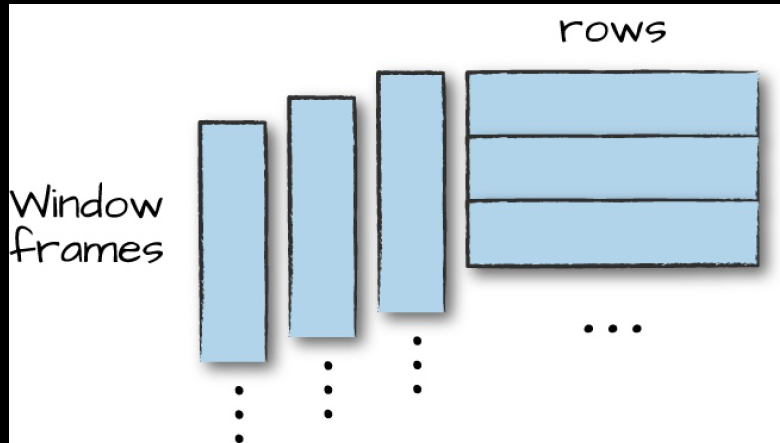

In [186]:
# cast to date spark type
from pyspark.sql.functions import col, to_date
dfWithDate = df.withColumn("date", to_date(col("InvoiceDate"), "MM/d/yyyy H:mm"))
dfWithDate.createOrReplaceTempView("dfWithDate")
dfWithDate.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: date (nullable = true)



The first step is to create a window specification.  
The ordering determines
the ordering within a given partition.  
The frame specification (the rowsBetween
statement) states which rows will be included in the frame based on its reference to the current
input row.

In [204]:
simpleData = (("James", "Sales", 3000), \
    ("Michael", "Sales", 4600),  \
    ("Robert", "Sales", 4100),   \
    ("Maria", "Finance", 3000),  \
    ("James", "Sales", 3000),    \
    ("Scott", "Finance", 3300),  \
    ("Jen", "Finance", 3900),    \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000),\
    ("Saif", "Sales", 4100) \
  )
 
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



In [221]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
windowSpec  = Window.partitionBy("department").orderBy("salary")

df.withColumn("row_number",row_number().over(windowSpec)) \
    .withColumn('rank', rank().over(windowSpec))\
    .show(truncate=False)

+-------------+----------+------+----------+----+
|employee_name|department|salary|row_number|rank|
+-------------+----------+------+----------+----+
|James        |Sales     |3000  |1         |1   |
|James        |Sales     |3000  |2         |1   |
|Robert       |Sales     |4100  |3         |3   |
|Saif         |Sales     |4100  |4         |3   |
|Michael      |Sales     |4600  |5         |5   |
|Maria        |Finance   |3000  |1         |1   |
|Scott        |Finance   |3300  |2         |2   |
|Jen          |Finance   |3900  |3         |3   |
|Kumar        |Marketing |2000  |1         |1   |
|Jeff         |Marketing |3000  |2         |2   |
+-------------+----------+------+----------+----+



In [224]:
# You can define window column and use it later in select
max_salary = max(col('salary')).over(windowSpec)
rank_salary = dense_rank().over(windowSpec)

df.select(
    F.expr('*')
    ,max_salary.alias('max_salary')
    ,rank_salary.alias('ranking')
).show(truncate=False)


+-------------+----------+------+----------+-------+
|employee_name|department|salary|max_salary|ranking|
+-------------+----------+------+----------+-------+
|James        |Sales     |3000  |3000      |1      |
|James        |Sales     |3000  |3000      |1      |
|Robert       |Sales     |4100  |4100      |2      |
|Saif         |Sales     |4100  |4100      |2      |
|Michael      |Sales     |4600  |4600      |3      |
|Maria        |Finance   |3000  |3000      |1      |
|Scott        |Finance   |3300  |3300      |2      |
|Jen          |Finance   |3900  |3900      |3      |
|Kumar        |Marketing |2000  |2000      |1      |
|Jeff         |Marketing |3000  |3000      |2      |
+-------------+----------+------+----------+-------+



## Grouping Sets

grouping sets is an aggregation across multiple groups (only available in SQL ).  
Grouping sets are a low-level tool for combining sets of aggregations together

In [ ]:
dfNoNull = dfwithDate.drop()
dfNoNull.createOrReplaceTempView("dfNoNull")
#sample with SQL // Sum quantity by customer id and stockcode
spark.sql("""
SELECT CustomerID, StockCode, sum(Quantity) AS Quantity_by_id_code
FROM dfNonull
GROUP BY CustomerID, StockCode
ORDER BY CustomerId DESC, StockCode DESC""").show(5)

+----------+---------+-------------------+
|CustomerID|StockCode|Quantity_by_id_code|
+----------+---------+-------------------+
|     18287|    85173|               48.0|
|     18287|   85040A|               48.0|
|     18287|   85039B|              120.0|
|     18287|   85039A|               96.0|
|     18287|    84920|                4.0|
+----------+---------+-------------------+
only showing top 5 rows



In [ ]:
# achieve same result using grouping set // need to filter out null value
spark.sql("""
SELECT CustomerID, StockCode, sum(Quantity) AS Quantity_by_id_code
FROM dfNonull
GROUP BY GROUPING SETS((CustomerId,StockCode)) 
ORDER BY CustomerId DESC, StockCode DESC""").show(5)

+----------+---------+-------------------+
|CustomerId|StockCode|Quantity_by_id_code|
+----------+---------+-------------------+
|     18287|    85173|               48.0|
|     18287|   85040A|               48.0|
|     18287|   85039B|              120.0|
|     18287|   85039A|               96.0|
|     18287|    84920|                4.0|
+----------+---------+-------------------+
only showing top 5 rows



to include the total number of items, regardless of
customer or stock code, you can union of several different groupings together

In [ ]:
spark.sql("""
SELECT CustomerID, StockCode, sum(Quantity) AS Quantity_by_id_code
FROM dfNonull
GROUP BY GROUPING SETS( (CustomerId,StockCode),() ) 
ORDER BY CustomerId DESC, StockCode DESC""").show(5)

+----------+---------+-------------------+
|CustomerId|StockCode|Quantity_by_id_code|
+----------+---------+-------------------+
|     18287|    85173|               48.0|
|     18287|   85040A|               48.0|
|     18287|   85039B|              120.0|
|     18287|   85039A|               96.0|
|     18287|    84920|                4.0|
+----------+---------+-------------------+
only showing top 5 rows



In [225]:
# a better example is 
dfbrand = spark.createDataFrame([('LV', 'M',10), ('Uniqlo', 'S',5), ('LV', 'L',3), ("Uniqlo", 'S',8)],('Brand','Size','Sales'))
dfbrand.createOrReplaceTempView("dfbrand")
dfbrand.show()

+------+----+-----+
| Brand|Size|Sales|
+------+----+-----+
|    LV|   M|   10|
|Uniqlo|   S|    5|
|    LV|   L|    3|
|Uniqlo|   S|    8|
+------+----+-----+



In [226]:
# the result is union of each group where () = no group at all
spark.sql("""
SELECT Brand, Size,sum(Sales)
FROM dfbrand
GROUP BY GROUPING SETS(   (Brand,Size) ,(Size) , ()   )
ORDER BY BRAND desc, SIZE DESC
""").show()

+------+----+----------+
| Brand|Size|sum(Sales)|
+------+----+----------+
|Uniqlo|   S|        13|
|    LV|   M|        10|
|    LV|   L|         3|
|  null|   S|        13|
|  null|   M|        10|
|  null|   L|         3|
|  null|null|        26|
+------+----+----------+



Row 1-3 is Grouping set by (Brand,size)  
Row 4-6 is Grouping set by (size) regardless of brand, etc  
Row 7 is Grouping set by none (just sum all)

## Rollups

create a rollup(multidimensional aggregation) that looks across time (with our new Date column) and space (with the
Country column) and   
creates a new DataFrame that includes the grand total over all dates, the
grand total for each date in the DataFrame, and the subtotal for each country on each date in the
DataFrame:

In [ ]:
rolledUpDF = dfNoNull.rollup('Date','Country').agg(pyf.sum('Quantity'))\
    .selectExpr('Date','Country'," `sum(Quantity)` as  total_quantity").orderBy('Date')
rolledUpDF.show(8)

+----------+--------------+--------------+
|      Date|       Country|total_quantity|
+----------+--------------+--------------+
|      null|          null|     5176450.0|
|2010-12-01|United Kingdom|       23949.0|
|2010-12-01|          EIRE|         243.0|
|2010-12-01|     Australia|         107.0|
|2010-12-01|        France|         449.0|
|2010-12-01|          null|       26814.0|
|2010-12-01|       Germany|         117.0|
|2010-12-01|        Norway|        1852.0|
+----------+--------------+--------------+
only showing top 8 rows



Now where you see the null values is where you’ll find the grand totals. A null in both rollup
columns specifies the grand total across both of those columns:

In [ ]:
# Total by date
rolledUpDF.where("Country IS NULL").show(5)

+----------+-------+--------------+
|      Date|Country|total_quantity|
+----------+-------+--------------+
|      null|   null|     5176450.0|
|2010-12-01|   null|       26814.0|
|2010-12-02|   null|       21023.0|
|2010-12-03|   null|       14830.0|
|2010-12-05|   null|       16395.0|
+----------+-------+--------------+
only showing top 5 rows



In [ ]:
# total for all
rolledUpDF.where("Date IS NULL").show()

+----+-------+--------------+
|Date|Country|total_quantity|
+----+-------+--------------+
|null|   null|     5176450.0|
+----+-------+--------------+



## Cube
A cube takes the rollup to a level deeper. Rather than treating elements hierarchically, a cube
does the same thing across all dimensions. This means that it won’t just go by date over the
entire time period, but also the country

In [ ]:
dfNoNull.cube("Date", "Country").agg(pyf.sum(col("Quantity")))\
    .select("Date", "Country", "sum(Quantity)").orderBy("Date").show(5)

+----+------------------+-------------+
|Date|           Country|sum(Quantity)|
+----+------------------+-------------+
|null|             Spain|      26824.0|
|null|           Denmark|       8188.0|
|null|    Czech Republic|        592.0|
|null|European Community|        497.0|
|null|            Norway|      19247.0|
+----+------------------+-------------+
only showing top 5 rows



In [ ]:
from pyspark.sql import Row
# more visualize example
studentsDF = spark.createDataFrame([
          ("mario", "italy", "europe",5),
          ("stefano", "italy", "europe",8),
          ("victor", "spain", "europe",8),
          ("li", "china", "asia",10),
          ("yuki", "japan", "asia",5),
          ("vito", "italy", "europe",3)
], ["name", "country", "continent",'sales'])
#
studentsDF.show()

+-------+-------+---------+-----+
|   name|country|continent|sales|
+-------+-------+---------+-----+
|  mario|  italy|   europe|    5|
|stefano|  italy|   europe|    8|
| victor|  spain|   europe|    8|
|     li|  china|     asia|   10|
|   yuki|  japan|     asia|    5|
|   vito|  italy|   europe|    3|
+-------+-------+---------+-----+



In [ ]:
# summarize on all dimension
studentsDF.cube('country','continent').agg(pyf.sum(col('sales'))).orderBy('country','continent').show()

+-------+---------+----------+
|country|continent|sum(sales)|
+-------+---------+----------+
|   null|     null|        39|
|   null|     asia|        15|
|   null|   europe|        24|
|  china|     null|        10|
|  china|     asia|        10|
|  italy|     null|        16|
|  italy|   europe|        16|
|  japan|     null|         5|
|  japan|     asia|         5|
|  spain|     null|         8|
|  spain|   europe|         8|
+-------+---------+----------+



Row 1 =  Grand total  
Row 2-3 = Sum by continent regardless of country  
Row 4-11 = sum by country regardless of continent 

## Grouping Metadata

using the grouping_id,
which gives us a column specifying the level of aggregation that we have in our result set.

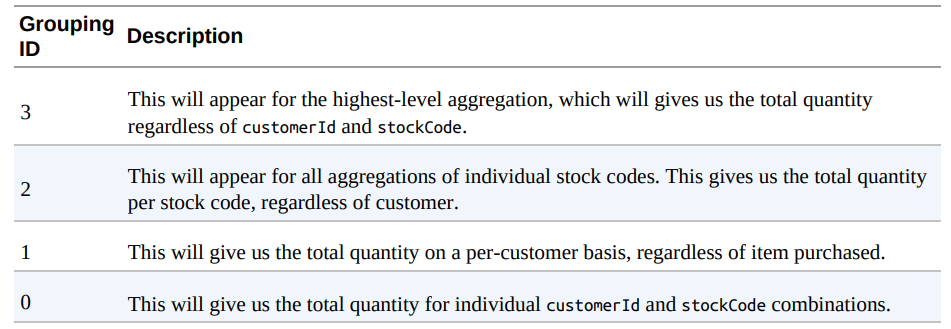![image.png](attachment:image.png)

In [ ]:
dfNoNull.cube("customerId", "stockCode").agg(pyf.grouping_id(), pyf.sum("Quantity"))\
.orderBy(col('CustomerId').desc())\
.show(5)

+----------+---------+-------------+-------------+
|customerId|stockCode|grouping_id()|sum(Quantity)|
+----------+---------+-------------+-------------+
|     18287|    23378|            0|         24.0|
|     18287|    20961|            0|         30.0|
|     18287|    21556|            0|         12.0|
|     18287|   85040A|            0|         48.0|
|     18287|    22306|            0|         24.0|
+----------+---------+-------------+-------------+
only showing top 5 rows



## Pivot
Convert row into column

In [227]:
simpleData = (("James", "Sales", 3000), \
    ("Michael", "Sales", 4600),  \
    ("Robert", "Sales", 4100),   \
    ("Maria", "Finance", 3000),  \
    ("James", "Sales", 3000),    \
    ("Scott", "Finance", 3300),  \
    ("Jen", "Finance", 3900),    \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000),\
    ("Saif", "Sales", 4100) \
  )
 
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



In [229]:
pivot_table = df.groupby("department").pivot("employee_name").sum()
pivot_table.show()

+----------+-----+----+----+-----+-----+-------+------+----+-----+
|department|James|Jeff| Jen|Kumar|Maria|Michael|Robert|Saif|Scott|
+----------+-----+----+----+-----+-----+-------+------+----+-----+
|     Sales| 6000|null|null| null| null|   4600|  4100|4100| null|
|   Finance| null|null|3900| null| 3000|   null|  null|null| 3300|
| Marketing| null|3000|null| 2000| null|   null|  null|null| null|
+----------+-----+----+----+-----+-----+-------+------+----+-----+



## User-Defined Aggregation Functions

You can use UDAFs to compute custom
calculations over groups of input data (as opposed to single rows). Spark maintains a single
AggregationBuffer to store intermediate results for every group of input data.

In [ ]:
a = sc.parallelize([[1, 1, 'aa'],
                    [1, 2, 'a'],
                    [1, 1, 'ba'],
                    [1, 2, 'b'],
                    [2, 1, 'cc']]).toDF(['id', 'value1', 'value2'])
a.show()

+---+------+------+
| id|value1|value2|
+---+------+------+
|  1|     1|    aa|
|  1|     2|     a|
|  1|     1|    ba|
|  1|     2|     b|
|  2|     1|    cc|
+---+------+------+



In [ ]:
def find_a(x):
  """Count occurance 'a's in list."""
  output_count = 0
  for i in x:
    if i == 'a':
      output_count += 1
  return output_count

find_a_udf = udf(find_a, IntegerType())

a.groupBy('id').agg(find_a_udf(pyf.collect_list('value2')).alias('a_count')).show() # only match exact 'a' not 'aa'

+---+-------+
| id|a_count|
+---+-------+
|  1|      1|
|  2|      0|
+---+-------+



# Part 8 Joins

In [231]:
# create sample table to use 
person = spark.createDataFrame([
    (0, "Bill Chambers", 0, [100]), # row 1 
    (1, "Matei Zaharia", 1, [500, 250, 100]), # row 2
    (2, "Michael Armbrust", 1, [250, 100])
]).toDF('student_id','name','graduate_program_id',"spark_status") # specify column name

graduateProgram = spark.createDataFrame([
    (0, "Masters", "School of Information", "UC Berkeley"),
    (2, "Masters", "EECS", "UC Berkeley"),
    (1, "Ph.D.", "Statistic", "UChicago")
]).toDF("id", "degree", "department", "school")

sparkStatus = spark.createDataFrame([
    (500, "Vice President"),
    (250, "PMC Member"),
    (100, "Contributor")
]).toDF("id", "status")

#Register in SQL
person.createOrReplaceTempView("person")
graduateProgram.createOrReplaceTempView("graduateProgram")
sparkStatus.createOrReplaceTempView("sparkStatus")

## Inner Joins (default)
evaluate the keys in both of the DataFrames and include
only the rows that evaluate to true.  
So we have to express keys for Spark to evaluate

API = 'inner', default  
SQL = JOIN, INNER JOIN

In [232]:
# 1. express keys for Spark to evaluate
joinExpression = person['graduate_program_id'] == graduateProgram['id']
# 2.join
person.join(graduateProgram,joinExpression,'inner').show() #left.join(right,expression,'how')

+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+
|student_id|            name|graduate_program_id|   spark_status| id| degree|          department|     school|
+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+
|         0|   Bill Chambers|                  0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|         1|   Matei Zaharia|                  1|[500, 250, 100]|  1|  Ph.D.|           Statistic|   UChicago|
|         2|Michael Armbrust|                  1|     [250, 100]|  1|  Ph.D.|           Statistic|   UChicago|
+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+



In [ ]:
# equal to this spark.SQL
spark.sql("""
SELECT *
FROM PERSON P
JOIN graduateProgram G on P.graduate_program_id = G.ID """).show()

+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+
|student_id|            name|graduate_program_id|   spark_status| id| degree|          department|     school|
+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+
|         0|   Bill Chambers|                  0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|         1|   Matei Zaharia|                  1|[500, 250, 100]|  1|  Ph.D.|           Statistic|   UChicago|
|         2|Michael Armbrust|                  1|     [250, 100]|  1|  Ph.D.|           Statistic|   UChicago|
+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+



## Outer Joins (Full outer joins)
evaluate the keys in both of the DataFrames and includes the rows that evaluate to true or false. If there is no equivalent row in either the left or
right DataFrame, Spark will insert null:  

API = 'outer'  
SQL = FULL OUTER JOIN or OUTER JOIN

In [ ]:
person.join(graduateProgram,joinExpression,'outer').show() # program id 2 cant match and return null for empty field

+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+
|student_id|            name|graduate_program_id|   spark_status| id| degree|          department|     school|
+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+
|         0|   Bill Chambers|                  0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|         1|   Matei Zaharia|                  1|[500, 250, 100]|  1|  Ph.D.|           Statistic|   UChicago|
|         2|Michael Armbrust|                  1|     [250, 100]|  1|  Ph.D.|           Statistic|   UChicago|
|      null|            null|               null|           null|  2|Masters|                EECS|UC Berkeley|
+----------+----------------+-------------------+---------------+---+-------+--------------------+-----------+



## Left Join (Left Join Outer JOIN)
Left outer joins evaluate the keys in both of the DataFrames or tables and includes all rows from
the left DataFrame as well as any rows in the right DataFrame that must have a match in the left
DataFrame

API = 'left' or 'left_outer'  
SQL = LEFT JOIN or LEFT OUTER JOIN

In [ ]:
graduateProgram.join(person,joinExpression,'left_outer').show()

+---+-------+--------------------+-----------+----------+----------------+-------------------+---------------+
| id| degree|          department|     school|student_id|            name|graduate_program_id|   spark_status|
+---+-------+--------------------+-----------+----------+----------------+-------------------+---------------+
|  0|Masters|School of Informa...|UC Berkeley|         0|   Bill Chambers|                  0|          [100]|
|  1|  Ph.D.|           Statistic|   UChicago|         1|   Matei Zaharia|                  1|[500, 250, 100]|
|  1|  Ph.D.|           Statistic|   UChicago|         2|Michael Armbrust|                  1|     [250, 100]|
|  2|Masters|                EECS|UC Berkeley|      null|            null|               null|           null|
+---+-------+--------------------+-----------+----------+----------------+-------------------+---------------+



## Right Joins (Right outer join)
evaluate the keys in both of the DataFrames or tables and includes all rows
from the right DataFrame as well as any rows in the left DataFrame that have a match in the right

API = 'right' or 'right_outer'  
SQL = RIGHT JOIN  or RIGHT OUTER JOIN

## Left Semi Joins

**Inner join but return only data from the left table** (Return data in table left that has key match in table right)   
API = 'left_semi'  
SQL = LEFT SEMI JOIN

In [ ]:
graduateProgram.join(person, joinExpression, 'left_semi').show()

+---+-------+--------------------+-----------+
| id| degree|          department|     school|
+---+-------+--------------------+-----------+
|  0|Masters|School of Informa...|UC Berkeley|
|  1|  Ph.D.|           Statistic|   UChicago|
+---+-------+--------------------+-----------+



## Left Anti Joins

Return only the data from left table that keys not in the right table (Simialr to NOT IN)

DPI = 'left_anti'
SQL = NOT IN , LEFT ANTI JOIN

In [ ]:
graduateProgram.join(person, joinExpression, 'left_anti').show()

+---+-------+----------+-----------+
| id| degree|department|     school|
+---+-------+----------+-----------+
|  2|Masters|      EECS|UC Berkeley|
+---+-------+----------+-----------+



In [ ]:
# Same thing as not in below
spark.sql("""
select *
FROM graduateProgram 
WHERE graduateProgram.id not in (SELECT graduate_program_id
                                FROM person)
""").show()

+---+-------+----------+-----------+
| id| degree|department|     school|
+---+-------+----------+-----------+
|  2|Masters|      EECS|UC Berkeley|
+---+-------+----------+-----------+



## Join on complex type (Join item in the list)

Join id which in the list in the spark_status

In [ ]:
# column id populate from spark_status
person.join(sparkStatus, expr("array_contains(spark_status, id)")).show()

+----------+----------------+-------------------+---------------+---+--------------+
|student_id|            name|graduate_program_id|   spark_status| id|        status|
+----------+----------------+-------------------+---------------+---+--------------+
|         0|   Bill Chambers|                  0|          [100]|100|   Contributor|
|         1|   Matei Zaharia|                  1|[500, 250, 100]|500|Vice President|
|         1|   Matei Zaharia|                  1|[500, 250, 100]|250|    PMC Member|
|         1|   Matei Zaharia|                  1|[500, 250, 100]|100|   Contributor|
|         2|Michael Armbrust|                  1|     [250, 100]|250|    PMC Member|
|         2|Michael Armbrust|                  1|     [250, 100]|100|   Contributor|
+----------+----------------+-------------------+---------------+---+--------------+



## Handling Duplicate Column Names

If two key column from 2 tables have the same name. Result will be error when reference, better to change name one of the column or dropping the column after join

In [ ]:
# set up the same name column
person2 = person.withColumnRenamed('graduate_program_id','id')

# we drop duplicate id after join
joinExpr = graduateProgram['id'] == person2['id']
person2.join(graduateProgram,joinExpr).drop(graduateProgram['id']).show()

+----------+----------------+---+---------------+-------+--------------------+-----------+
|student_id|            name| id|   spark_status| degree|          department|     school|
+----------+----------------+---+---------------+-------+--------------------+-----------+
|         0|   Bill Chambers|  0|          [100]|Masters|School of Informa...|UC Berkeley|
|         1|   Matei Zaharia|  1|[500, 250, 100]|  Ph.D.|           Statistic|   UChicago|
|         2|Michael Armbrust|  1|     [250, 100]|  Ph.D.|           Statistic|   UChicago|
+----------+----------------+---+---------------+-------+--------------------+-----------+



In [ ]:
# join on string instad of boolean expression
person2.join(graduateProgram,'id').show() # must be same name to be able to directly express in string

+---+----------+----------------+---------------+-------+--------------------+-----------+
| id|student_id|            name|   spark_status| degree|          department|     school|
+---+----------+----------------+---------------+-------+--------------------+-----------+
|  0|         0|   Bill Chambers|          [100]|Masters|School of Informa...|UC Berkeley|
|  1|         1|   Matei Zaharia|[500, 250, 100]|  Ph.D.|           Statistic|   UChicago|
|  1|         2|Michael Armbrust|     [250, 100]|  Ph.D.|           Statistic|   UChicago|
+---+----------+----------------+---------------+-------+--------------------+-----------+



## Communication Strategies

### Big table–to–big table
Spark use *shuffle join* to join a big table to another big table.  
This means every node(Executors) talk and share keys with every other node that store partitions of data. (expensive joins)

### Big table–to–small table
Table is small enough to fit in the memory of single worker node. Spark use *broadcast join* which means replicate small DataFrame onto every worker node in the cluster. This prevent us from performing the all-to-all communication during the entire join process then let each individual worker node perform the
work without having to wait or communicate with any other worker nodes.

# Part 9. Data Sources

## The Structure of the Data Sources API

### Read API Structure

In [ ]:
# version 1
spark.read.format(...).option("mode", "FAILFAST").option("key", "value").schema(...).load()
# version 2
spark.read.csv(
    datapath
    ,schema
    ,header
    ,mode
)

After we have a DataFrame reader, we specify several values:  
The format  
The schema  
The read mode  
A series of options  

#### Read modes
Read modes specify what will happen
when Spark does come across malformed records

| Read mode     | Description                                                                                                                              |
|---------------|------------------------------------------------------------------------------------------------------------------------------------------|
| permissive    | Sets all fields to null when it encounters a corrupted record and places all corrupted records in a string column called _corrupt_record |
| dropMalformed | Drops the row that contains malformed records                                                                                            |
| failFast      | Fails immediately upon encountering malformed records                                                                                    |

### Write API Structure

In [ ]:
DataFrameWriter.format(...).option(...).partitionBy(...).bucketBy(...).sortBy(...).save()
# or
spark.write.csv(
    #...
)

#### Save modes

| Save mode     | Description                                                                                  |
|---------------|----------------------------------------------------------------------------------------------|
| append        | Appends the output files to the list of files that already exist at that location            |
| overwrite     | Will completely overwrite any data that already exists there                                 |
| errorIfExists | Throws an error and fails the write if data or files already exist at the specified location |
| ignore        | If data or files exist at the location, do nothing with the current DataFrame                |

The default is errorIfExists. This means that if Spark finds data at the location to which
you’re writing, it will fail the write immediately.

## CSV Files

### Read CSV

In [ ]:
# csv files
spark.read.format("csv")\
            .option("header", "true")\
            .option("mode", "FAILFAST")\
            .option("inferSchema", "true")\ #Specifies whether Spark should infer column types when reading the file.
            .load("some/path/to/file.csv")\

### Write CSV

In [ ]:
# version 1
# read to FileForWrite first
csvFile = spark.read.format("csv")\
            .option("header", "true")\
            .option("mode", "FAILFAST")\
            .option("inferSchema", "true")\
            .load("data/flight-data/csv/2010-summary.csv")
# then write
csvFile.write.format("csv").mode("overwrite").option("sep", "\t").save("tmp/my-tsv-file.tsv")
#This actually reflects the number of partitions in our DataFrame at the time we write it out. If

In [235]:
# version2
csvFile = spark.read.csv(
    datapath + 'flight-data/csv/2010-summary.csv'
    ,header = True
    ,mode = "FAILFAST"
    ,inferSchema = True
)
# then write
csvFile.write.parquet(
    datapath + 'tmp/tmkp.parquet'
    ,mode = 'overwrite'
)

In [239]:
%%shell
ls Spark-The-Definitive-Guide/data/tmp/

tmkp.parquet


## Comparison
| Type    | <span style="white-space:nowrap">Inference Type</span> | <span style="white-space:nowrap">Inference Speed</span> | Reason                                          | <span style="white-space:nowrap">Should Supply Schema?</span> |
|---------|--------------------------------------------------------|---------------------------------------------------------|----------------------------------------------------|:--------------:|
| <b>CSV</b>     | <span style="white-space:nowrap">Full-Data-Read</span> | <span style="white-space:nowrap">Slow</span>            | <span style="white-space:nowrap">File size</span>  | Yes            |
| <b>Parquet</b> | <span style="white-space:nowrap">Metadata-Read</span>  | <span style="white-space:nowrap">Fast/Medium</span>     | <span style="white-space:nowrap">Number of Partitions</span> | No (most cases)             |
| <b>Tables</b>  | <span style="white-space:nowrap">n/a</span>            | <span style="white-space:nowrap">n/a</span>            | <span style="white-space:nowrap">Predefined</span> | n/a            |
| <b>JSON</b>    | <span style="white-space:nowrap">Full-Read-Data</span> | <span style="white-space:nowrap">Slow</span>            | <span style="white-space:nowrap">File size</span>  | Yes            |
| <b>Text</b>    | <span style="white-space:nowrap">Dictated</span>       | <span style="white-space:nowrap">Zero</span>            | <span style="white-space:nowrap">Only 1 Column</span>   | Never          |
| <b>JDBC</b>    | <span style="white-space:nowrap">DB-Read</span>        | <span style="white-space:nowrap">Fast</span>            | <span style="white-space:nowrap">DB Schema</span>  | No             |

### Reading CSV
- `spark.read.csv(..)`
- There are a large number of options when reading CSV files including headers, column separator, escaping, etc.
- We can allow Spark to infer the schema at the cost of first reading in the entire file.
- Large CSV files should always have a schema pre-defined.

### Reading Parquet
- `spark.read.parquet(..)`
- Parquet files are the preferred file format for big-data.
- It is a columnar file format.
- It is a splittable file format.
- It offers a lot of performance benefits over other formats including predicate pushdown.
- Unlike CSV, the schema is read in, not inferred.
- Reading the schema from Parquet's metadata can be extremely efficient.

### Reading Tables
- `spark.read.table(..)`
- The Databricks platform allows us to register a huge variety of data sources as tables via the Databricks UI.
- Any `DataFrame` (from CSV, Parquet, whatever) can be registered as a temporary view.
- Tables/Views can be loaded via the `DataFrameReader` to produce a `DataFrame`
- Tables/Views can be used directly in SQL statements.

### Reading JSON
- `spark.read.json(..)`
- JSON represents complex data types unlike CSV's flat format.
- Has many of the same limitations as CSV (needing to read the entire file to infer the schema)
- Like CSV has a lot of options allowing control on date formats, escaping, single vs. multiline JSON, etc.

### Reading Text
- `spark.read.text(..)`
- Reads one line of text as a single column named `value`.
- Is the basis for more complex file formats such as fixed-width text files.

### Reading JDBC
- `spark.read.jdbc(..)`
- Requires one database connection per partition.
- Has the potential to overwhelm the database.
- Requires specification of a stride to properly balance partitions.

## JSON file

Read-in types:  

MultiLine. When you set this option to true, you can read an entire file as one dataframe  
Line-delimited JSON is actually a much more stable format because it allows you to append to a file with a new record

### Reading JSON Files

In [ ]:
spark.read.format('json').option('mode','failfast').option('inferSchema','true')\
.load("data/flight-data/json/2010-summary.json").show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
+-----------------+-------------------+-----+
only showing top 3 rows



### Writing JSON Files

In [ ]:
#reuse the CSV DataFrame that we created earlier to be the source for our JSON file
csvFile.write.format("json").mode("overwrite").save("tmp/my-json-file.json")

## Parquet Files

Parquet is an open source column-oriented data store that provides a variety of storage
optimizations, especially for analytics workloads.  
We
recommend writing data out to Parquet for long-term storage because reading from a Parquet file
will always be more efficient than JSON or CSV. Another advantage of Parquet is that it
supports complex types(array,map, or struct).

### Reading Parquet Files

In [ ]:
spark.read.format("parquet")\
.load("data/flight-data/parquet/2010-summary.parquet").show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



### Writing Parquet Files 

In [ ]:
csvFile.write.format("parquet").mode("overwrite")\
.save("tmp/my-parquet-file.parquet")

## SQL Databases

In [ ]:
# defined the connection properties
driver = "org.sqlite.JDBC"
path = "data/flight-data/jdbc/my-sqlite.db"
url = "jdbc:sqlite:" + path
tablename = "flight_info"

In [ ]:
dbDataFrame = spark.read.format("jdbc").option("url", url)\
.option("dbtable", tablename).option("driver", driver).load()

In [ ]:
# pass SQL query down 
pushdownQuery = """(SELECT DISTINCT(DEST_COUNTRY_NAME) FROM flight_info) AS flight_info"""
dbDataFrame = spark.read.format("jdbc")\
.option("url", url).option("dbtable", pushdownQuery).option("driver", driver)\
.load()

### Reading from databases in parallel

Specify the ability to specify a maximum number of
partitions to allow you to limit how much you are reading and writing in parallel:

In [ ]:
dbDataFrame = spark.read.format("jdbc")\
.option("url", url).option("dbtable", tablename).option("driver", driver)\
.option("numPartitions", 10).load()

we can also go further by having them arrive in their own partitions
in Spark. We do that by specifying a list of predicates when we create the data source:

In [ ]:
props = {"driver":"org.sqlite.JDBC"}
predicates = [
            "DEST_COUNTRY_NAME = 'Sweden' OR ORIGIN_COUNTRY_NAME = 'Sweden'",
            "DEST_COUNTRY_NAME = 'Anguilla' OR ORIGIN_COUNTRY_NAME = 'Anguilla'"]
spark.read.jdbc(url, tablename, predicates=predicates, properties=props).show()
spark.read.jdbc(url,tablename,predicates=predicates,properties=props)\
.rdd.getNumPartitions() # 2

### Partitioning based on a sliding window

Spark then queries our database in parallel and returns numPartitions partitions.
We simply modify the upper and lower bounds in order to place certain values in certain
partitions

In [ ]:
# set up
colName = "count"
lowerBound = 0
upperBound = 348113 # this is the max count in our database
numPartitions = 10

In [ ]:
# This will distribute the intervals equally from low to high:
spark.read.jdbc(url, tablename, column=colName, properties=props,
                lowerBound=lowerBound, upperBound=upperBound,
                numPartitions=numPartitions).count() # 255

### Writing to SQL Databases

In [ ]:
newPath = "jdbc:sqlite://tmp/my-sqlite.db"
csvFile.write.jdbc(newPath, tablename, mode="overwrite", properties=props)

## Text file

### Read text

In [246]:
spark.read.text(datapath + "flight-data/csv/2010-summary.csv")\
.selectExpr('*').show(4,False)

+-------------------------------------------+
|value                                      |
+-------------------------------------------+
|DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,count|
|United States,Romania,1                    |
|United States,Ireland,264                  |
|United States,India,69                     |
+-------------------------------------------+
only showing top 4 rows



In [252]:
spark.read.text(datapath + "flight-data/csv/2010-summary.csv")\
.selectExpr("split(value, ',') as rows").show(5,False)

+-----------------------------------------------+
|rows                                           |
+-----------------------------------------------+
|[DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME, count]|
|[United States, Romania, 1]                    |
|[United States, Ireland, 264]                  |
|[United States, India, 69]                     |
|[Egypt, United States, 24]                     |
+-----------------------------------------------+
only showing top 5 rows



### Write text
make sure to have only one string column; otherwise, the
write will fail:

In [ ]:
FileForWrite.select("DEST_COUNTRY_NAME").write.text("/tmp/simple-text-file2.txt")

## Splittable File Types and Compression

We recommend Parquet with gzip compression.

### Writing Data in Parallel

In [ ]:
# will end up with five files inside of that folder
csvFile.repartition(5).write.format("csv").save("/tmp/multiple.csv")

### Partitioning
Partitioning is a tool that allows you to control what data is stored (and where) as you write it.  
Basically encode a column(or date) as a
folder allows you to read in only the data relevant to your problem instead of having to scan the complete
dataset.

In [ ]:
csvFile.limit(10).write.mode("overwrite").partitionBy("DEST_COUNTRY_NAME")\
.save("tmp/partitioned-files.parquet")

### Bucketing

This will create a certain number of
files and organize our data into those “buckets ID”: can help avoid shuffles later when you go to read the data
because data with the same bucket ID will all be grouped together into one physical partition

In [ ]:
numberBuckets = 10
columnToBucketBy = "count"

In [ ]:
csvFile.write.format("parquet").mode("overwrite").bucketBy(numberBuckets, columnToBucketBy).saveAsTable("bucketedFiles")

**Managing file sizes is an important factor not so much for writing data but reading it later on.**  

Too small files(small file problem) : incur significant metadata overhead that you incur
managing all of those files.

Too large files becomes inefficient to have to read entire blocks of data when you need only a
few rows.

Limit output file sizes so that you can target an optimum file size with $maxRecordsPerFile$ option and specify a number of your choosing

In [ ]:
df.write.option("maxRecordsPerFile", 5000)

# Part 10. Spark SQL

Spark SQL is intended to operate as an online analytic processing (OLAP) database, not an online
transaction processing (OLTP) database. This means that it is not intended to perform extremely lowlatency
queries

In [ ]:
spark.sql("SELECT 1 + 1 as New_Column").show()

+----------+
|New_Column|
+----------+
|         2|
+----------+



Combine SQL and DataFrame API to query

In [ ]:
# create view
spark.read.json("data/flight-data/json/2015-summary.json")\
.createOrReplaceTempView("some_sql_view") # DF => SQL

In [ ]:
spark.sql("""select *
            FROM some_sql_view""").show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+
only showing top 2 rows



In [ ]:
spark.sql("""SELECT DEST_COUNTRY_NAME, sum(count)
            FROM some_sql_view 
            GROUP BY DEST_COUNTRY_NAME""")\
.where("DEST_COUNTRY_NAME like 'S%'").where("`sum(count)` > 10")\ # Use back tick for sum 
.count() # SQL => DF

12

## SparkSQL Thrift JDBC/ODBC Server

use case is for a business analyst to connect business intelligence software like Tableau to Spark through Java Database Connectivity (JDBC) interface.

either launch $spark-sql$ and directly use sql or wrap sql in spark.sql in programmatic interface

## Table

### Create tables

$USING$ specify format of target. If you do not specify the format, Spark will default to a Hive SerDe configuration.

In [ ]:
# create table using spark.sql
spark.sql("""CREATE TABLE flights (
DEST_COUNTRY_NAME STRING, ORIGIN_COUNTRY_NAME STRING, count LONG)
USING JSON OPTIONS (path 'data/flight-data/json/2015-summary.json')""")

DataFrame[]

In [ ]:
# add comments to certain columns in a table
spark.sql("""CREATE TABLE flights_csv (DEST_COUNTRY_NAME STRING,
                                        ORIGIN_COUNTRY_NAME STRING COMMENT "remember, the US will be most prevalent",
                                        count LONG)
USING csv OPTIONS (header true, path 'data/flight-data/csv/2015-summary.csv')""")

DataFrame[]

In [ ]:
#query from table flights_csv3
spark.sql("""select * from flights_csv limit 3""").show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
+-----------------+-------------------+-----+



In [ ]:
# create partitioned table
spark.sql("""CREATE TABLE partitioned_flights USING parquet PARTITIONED BY (DEST_COUNTRY_NAME)
AS SELECT DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME, count FROM flights LIMIT 5""")

In [ ]:
# It is possible to create a table from a query as well:
spark.sql("""CREATE TABLE flights_from_select USING parquet AS SELECT * FROM flights""")

Show and drop tables

In [ ]:
spark.sql('show tables').show()

+--------+-------------+-----------+
|database|    tableName|isTemporary|
+--------+-------------+-----------+
| default|      flights|      false|
| default|  flights_csv|      false|
|        |some_sql_view|       true|
+--------+-------------+-----------+



In [ ]:
spark.sql('DROP TABLE tablename')

DataFrame[]

In [ ]:
spark.sql('DROP VIEW IF EXISTS  view_name')

### Inserting into Tables

In [ ]:
spark.sql("""INSERT INTO flights_from_select
SELECT DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME, count FROM flights LIMIT 20""")

### Describing Table Metadata
View comment(table meta data) that created a table

In [ ]:
spark.sql("""DESCRIBE TABLE flights_csv""").show()

+-------------------+---------+--------------------+
|           col_name|data_type|             comment|
+-------------------+---------+--------------------+
|  DEST_COUNTRY_NAME|   string|                null|
|ORIGIN_COUNTRY_NAME|   string|remember, the US ...|
|              count|   bigint|                null|
+-------------------+---------+--------------------+



In [ ]:
#see the partitioning
spark.sql("""SHOW PARTITIONS partitioned_flights""")

### Refreshing Table Metadata
ensure that you’re reading from the most
recent set of data

In [ ]:
spark.sql("""REFRESH table flights_csv""")

DataFrame[]

## View
A view specifies a set
of transformations on top of an existing table

### Create Views
basically just saved query plans for reusing

In [ ]:
spark.sql('''
create view just_usa_view AS
select *
from flights
where dest_country_name = "United States" ''')

spark.sql("""
select * from just_usa_view limit 3""").show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
+-----------------+-------------------+-----+



Like tables, you can create temporary views that are available only during the current session and
are not registered to a database

In [ ]:
spark.sql("""
CREATE OR REPLACE TEMP VIEW just_usa_view_temp AS 
SELECT * FROM flights WHERE dest_country_name = 'United States' 
""")
# OR REPLACE -> overwrite if already exist
# TEMP -> exist only in this session

DataFrame[]

## Databases

In [ ]:
spark.sql('show databases').show()

+------------+
|databaseName|
+------------+
|     default|
+------------+



### Create database

In [ ]:
spark.sql('create database spark_def')

DataFrame[]

In [ ]:
# show current data base in use
spark.sql('''SELECT current_database()''').show()

+------------------+
|current_database()|
+------------------+
|           default|
+------------------+



### Setting and dropping databases

In [ ]:
spark.sql('use spark_def')
spark.sql('''SELECT current_database()''').show()

+------------------+
|current_database()|
+------------------+
|         spark_def|
+------------------+



In [ ]:
# Error table not found because flights is in defaul database
try:
    spark.sql("""select * from flights""").show()
except:
    print('tables not found in this database')

tables not found in this database


In [ ]:
# specify databases name whem cross query database
spark.sql("""select * from default.flights limit 2""").show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
+-----------------+-------------------+-----+



In [ ]:
# drop database/ only when database is empty
spark.sql(""" drop database if exists spark_def""")

DataFrame[]

## Select Statements
all options from SQL (ANSI SQL)

In [ ]:
SELECT [ALL|DISTINCT] named_expression[, named_expression, ...]  
FROM relation[, relation, ...]  
    [lateral_view[, lateral_view, ...]]  
    [WHERE boolean_expression]  
    [aggregation [HAVING boolean_expression]]  
    [ORDER BY sort_expressions]  
    [CLUSTER BY expressions]  
    [DISTRIBUTE BY expressions]  
    [SORT BY sort_expressions]  
    [WINDOW named_window[, WINDOW named_window, ...]]  
    [LIMIT num_rows]  
named_expression:  
    : expression [AS alias]  
relation:  
    | join_relation  
    | (table_name|query|relation) [sample] [AS alias]  
    : VALUES (expressions)[, (expressions), ...]  
        [AS (column_name[, column_name, ...])]  
expressions:  
    : expression[, expression, ...]  
sort_expressions:  
    : expression [ASC|DESC][, expression [ASC|DESC], ...]  

page 198

## Complex Types in SQL
### Structs 
nested data in spark

In [ ]:
# wrap a set of columns (or expressions) in parentheses
spark.sql("""
CREATE VIEW IF NOT EXISTS nested_data AS 
    SELECT (DEST_COUNTRY_NAME, ORIGIN_COUNTRY_NAME) as country, count 
    FROM flights""")
spark.sql("""
SELECT country as DEST_ORIGIN , count
FROM nested_data
LIMIT 5""").show(5,False)

+------------------------+-----+
|DEST_ORIGIN             |count|
+------------------------+-----+
|[United States, Romania]|15   |
|[United States, Croatia]|1    |
|[United States, Ireland]|344  |
|[Egypt, United States]  |15   |
|[United States, India]  |62   |
+------------------------+-----+



You can even query individual columns within a struct—all you need to do is use dot syntax

In [ ]:
spark.sql("""
SELECT country.ORIGIN_COUNTRY_NAME as ORIGIN , count
FROM  nested_data
""").show(5,False)

+-------------+-----+
|ORIGIN       |count|
+-------------+-----+
|Romania      |15   |
|Croatia      |1    |
|Ireland      |344  |
|United States|15   |
|India        |62   |
+-------------+-----+
only showing top 5 rows



Or return all sub-column in the nested column

In [ ]:
spark.sql("""
SELECT country.* 
FROM  nested_data
""").show(5,False)

+-----------------+-------------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|
+-----------------+-------------------+
|United States    |Romania            |
|United States    |Croatia            |
|United States    |Ireland            |
|Egypt            |United States      |
|United States    |India              |
+-----------------+-------------------+
only showing top 5 rows



### Lists

Use collect_list or collect_set to create aggregate list group by one column

In [ ]:
spark.sql("""
SELECT DEST_COUNTRY_NAME as new_name, collect_list(count) as flight_counts,
    collect_set(ORIGIN_COUNTRY_NAME) as origin_set
FROM flights 
GROUP BY DEST_COUNTRY_NAME
ORDER BY DEST_COUNTRY_NAME DESC
""").show(4)

+-------------+--------------------+--------------------+
|     new_name|       flight_counts|          origin_set|
+-------------+--------------------+--------------------+
|       Zambia|                 [1]|     [United States]|
|    Venezuela|               [290]|     [United States]|
|      Uruguay|                [43]|     [United States]|
|United States|[145, 225, 15, 1,...|[Italy, Martiniqu...|
+-------------+--------------------+--------------------+
only showing top 4 rows



Then convert array back into rows using *explode* function

In [ ]:
SELECT explode(collected_counts), DEST_COUNTRY_NAME FROM flights_agg

### Functions

In [ ]:
# list of all user-define SQL functions
spark.sql(''' SHOW  USER FUNCTIONS ''').show()

+--------+
|function|
+--------+
+--------+



# Part 12 Resilient Distributed Datasets (RDDs)

Working with low-level API(RDDs) when want more control ,such as implement some custom partitioner, physical distribution of data (custom partitioning of data)., or update and track the value
of a variable over the course of a data pipeline’s execution.

In [ ]:
# access lowe-level API with sparkContext
spark.sparkContext

<SparkContext master=local appName=SparkApp>

## RDD

RDD is an immutable, partitioned collection of records that can be operated
on in parallel. Unlike DataFrames though, where each record is a structured row containing
fields with a known schema, in RDDs the records are just Java, Scala, or Python objects of the
programmer’s choosing

So,You can store anything you want in these objects, in any format you want. But come with a lot of manual tasks.  
However, it is
trivial to convert back and forth between RDDs and Datasets to take advantage of both API

## Create RDDs

### Convert DataFrames to RDDs 

In [ ]:
spark.range(10).rdd

MapPartitionsRDD[40] at javaToPython at <unknown>:0

In [ ]:
# need to convert Row object to RDD of type Row
spark.range(10).toDF('id').rdd.map(lambda row: row[0])

PythonRDD[34] at RDD at PythonRDD.scala:53

### From a local Collection
use paralellize on SparkContext

In [ ]:
myCollection = "Spark The Definitive Guide : Big Data Processing Made Simple".split(" ")
words = spark.sparkContext.parallelize(myCollection, numSlices=2)
# can set name of RDD
words.setName('myWords')

words.name()

'myWords'

### From Data Sources
90% of the time Data Source from DataFrame API will better then than RDD. But you can do this with

In [ ]:
spark.sparkContext.textFile('some.txt') # each record in the RDD represents a line in that text file or files
spark.sparkContext.wholeTextFiles("withTextFiles") #each text file should become a single record

## Manipulating RDDs

## Transformations

### Distinct
Remove duplicates from RDD

In [ ]:
words.distinct().count()

10

### filter
Use function to return Boolean type

In [ ]:
def startsWithS(individual):
    return individual.startsWithS('S')

# words.filter(lambda x: startsWithS(x)).collect()

Page 221

# Part 15 How Spark runs on Cluster

## Execution Modes
Choosing the execution
mode when running your applications. It gives you the power to determine where the aforementioned resources are
physically located when you go to run your application

### Cluster mode (All job on cluster)
User submit script to a cluster manager. the cluster manager is responsible for maintaining all Spark
Application–related processes(launches the driver process on a worker node).

### Client mode (Client mange driver, run job on cluster)
the Spark driver remains on the client
machine that submitted the application. Client machine is responsible for
maintaining the Spark driver process, and the cluster manager maintains the executor processses.

### Local mode (All job on single machine)
for test and experiment

## The Life Cycle of a Spark Application (Outside Spark)

### 1. Client Request

request to a driver node asking for resources(spark-submit) for driver process then the application is running at the cluster

In [ ]:
# in terminal
./bin/spark-submit \
--class <main-class> \
--master <master-url> \
--deploy-mode cluster \
--conf <key>=<value> \
... # other options
<application-jar> \
[application-arguments]

## The Life Cycle of a Spark Application (Inside Spark)

### 1. SparkSession
Create SparkSession

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Word Count")\
.config("spark.some.config.option", "some-value")\
.getOrCreate()

### A Spark Job

In general, there should be one Spark job for one action. Actions always return results. Each job
breaks down into a series of stages and stages break into tasks(partitions)

### Stages
roups of tasks that can be executed together to compute the same
operation on multiple machines.  
but the engine starts
new stages after operations called shuffles. A shuffle represents a physical repartitioning of the
data—for example, sorting a DataFrame, or grouping data that was loaded from a file

### Tasks
Each task corresponds to a combination of blocks of data and a
set of transformations that will run on a single executor. If there is one big partition in our
dataset, we will have one task. If there are 1,000 little partitions, we will have 1,000 tasks that
can be executed in parallel.

### Pipelining
In-memory computation -> Spark performs as many steps at once before writing data to memory or disk.  
Pipelining collapse all operation in the same nodes into single stage of tasks

### Shuffle Persistence
When Spark run an
operation that move data across nodes, such as a reduce-by-key operation it performs a cross-network shuffle.   
Spark always executes
shuffles by first having the “source” tasks (those sending data) write shuffle files to their local
disks during their execution stage.   
Then, the stage that does the grouping and reduction launches
and runs tasks that fetch their corresponding records from each shuffle file and performs that
computation.  
Saving the shuffle
files to disk lets Spark run this stage later in time than the source stage and relaunch again

# Part 16 Developing Spark Applications

Specify a certain script as an executable script that builds the SparkSession. This is the
one that we will pass as the main argument to spark-submit and simply execute the script
against the cluster.

In [ ]:
# in Python
from __future__ import print_function
if __name__ == '__main__':
    from pyspark.sql import SparkSession
    spark = SparkSession.builder \
        .master("local") \
        .appName("Word Count") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    
    print(spark.range(5000).where("id > 500").selectExpr("sum(id)").collect())

### Running the application

call spark-submit with that
information:

$SPARK_HOME/bin/spark-submit --master local pyspark_template/main.py

### The Development Process
First, you might maintain a scratch space, such as an interactive
notebook or some equivalent thereof, and then as you build key components and algorithms, you
move them to a more permanent location like a library or package

When running on your local machine, the spark-shell and its various language-specific
implementations are probably the best way to develop applications. For the most part, the shell is
for interactive applications, whereas spark-submit is for production applications on your Spark
cluster.

# Part 17 Deploying Spark

Spark has three officially supported cluster managers:  
Standalone mode  
Hadoop YARN  
Apache Mesos  

**On-Premise Spark** (Physical Cluster)  

An on-premises cluster gives you full control over the hardware used,
meaning you can optimize performance for your specific workload. 

However, it also introduces
some challenges, 1. your cluster is fixed in size, whereas the resource demands of data
analytics workloads are often elastic. If you make your cluster too small, it will be hard to launch
the occasional very large analytics query or training job for a new machine learning model,
whereas if you make it large, you will have resources sitting idle.  
2.need setting up georeplication and disaster recovery if
required.
**Spark in the Cloud**

Benefit are First, resources can be launched and shut down elastically,
so you can run that occasional “monster” job that takes hundreds of machines for a few hours.

Setup global storage systems that are decoupled
from a specific cluster, such as Amazon S3, Azure Blob Storage, or Google Cloud Storage and
spin up machines dynamically for each Spark workload.


# Part 24 Machine Learning Overview

## Supervised Learning
using historical data that already has labels , train a model
to predict the values of those labels based on various features of the data points. 

This
training process usually proceeds through an iterative optimization algorithm such as gradient
descent. The training algorithm starts with a basic model and gradually improves it by adjusting
various internal parameters (coefficients) during each training iteration.

### Recommendation
recommendations on what a user may like by
drawing similarities between the users or items. By looking at these similarities, the algorithm
makes recommendations to users based on what similar users liked, or what other products
resemble the ones the user already purchased.

## Unsupervised learning 
trying to find patterns or discover the underlying structure in
a given set of data. This differs from supervised learning because there is no dependent variable
(label) to predict.

## MLlib
Why use MLlib?  
When data is or processing time is too big for a single machine

In [ ]:
df = spark.read.json('data/simple-ml')
df.show(3) # label is good or bad

+-----+----+------+------------------+
|color| lab|value1|            value2|
+-----+----+------+------------------+
|green|good|     1|14.386294994851129|
| blue| bad|     8|14.386294994851129|
| blue| bad|    12|14.386294994851129|
+-----+----+------+------------------+
only showing top 3 rows



## Feature Engineering

### Transformers 
When we use MLlib, all inputs to machine learning algorithms  in Spark must consist of type Double (for labels) and
Vector[Double] (for features).

Using RFormula to transform data (double into vector of double for features)

In [ ]:
from pyspark.ml.feature import RFormula
supervised = RFormula(formula= 'lab ~ . ') # syntax like in R ,   '.' mean every thing
# RFormula auto encode categorical variable

In [ ]:
fittedRF = supervised.fit(df)
prepareDF = fittedRF.transform(df)
prepareDF.show(3,False)

+-----+----+------+------------------+---------------------------------+-----+
|color|lab |value1|value2            |features                         |label|
+-----+----+------+------------------+---------------------------------+-----+
|green|good|1     |14.386294994851129|[0.0,1.0,1.0,14.386294994851129] |1.0  |
|blue |bad |8     |14.386294994851129|[0.0,0.0,8.0,14.386294994851129] |0.0  |
|blue |bad |12    |14.386294994851129|[0.0,0.0,12.0,14.386294994851129]|0.0  |
+-----+----+------+------------------+---------------------------------+-----+
only showing top 3 rows



Features vector: [? , color, value1, value 2]

In [ ]:
from pyspark.ml.feature import RFormula
supervised = RFormula(formula= 'lab ~ . + color:value1 + color:value2') #  : is interaction
fittedRF = supervised.fit(df)
prepareDF = fittedRF.transform(df)
prepareDF.show(3,False)

+-----+----+------+------------------+--------------------------------------------------------------------+-----+
|color|lab |value1|value2            |features                                                            |label|
+-----+----+------+------------------+--------------------------------------------------------------------+-----+
|green|good|1     |14.386294994851129|(10,[1,2,3,5,8],[1.0,1.0,14.386294994851129,1.0,14.386294994851129])|1.0  |
|blue |bad |8     |14.386294994851129|(10,[2,3,6,9],[8.0,14.386294994851129,8.0,14.386294994851129])      |0.0  |
|blue |bad |12    |14.386294994851129|(10,[2,3,6,9],[12.0,14.386294994851129,12.0,14.386294994851129])    |0.0  |
+-----+----+------+------------------+--------------------------------------------------------------------+-----+
only showing top 3 rows



Create train and test set

In [ ]:
train, test = prepareDF.randomSplit([0.8,0.2])

### Estimators
using logisticRegression to fit model  
set label and feature column

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="label",featuresCol="features") # specify feature and label column names
print(lr.explainParams()) # inspect the parameters

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

In [ ]:
# fit the model
fittedLR = lr.fit(train)

# make prediction with transfrom
fittedLR.transform(train).select("label", "prediction").show(3)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 3 rows



## Pipeline Work flow


Step 1 
Create train and test set

In [ ]:
train, test = df.randomSplit([0.8,0.2])

Create each stage in pipeline (RFormula, LogisticRegression)

In [ ]:
rForm = RFormula()

In [ ]:
lr = LogisticRegression().setLabelCol('label').setFeaturesCol('features')

In [ ]:
# set up pipeline
from pyspark.ml import Pipeline
stages = [rForm,lr]
pipeline = Pipeline().setStages(stages)

### Training and Evaluation

train several variations of the model by
specifying different combinations of hyperparameters

In [ ]:
# GridBuilder (GridSearch)
from pyspark.ml.tuning import ParamGridBuilder
params = ParamGridBuilder()\
    .addGrid(rForm.formula, [
    "lab ~ . + color:value1",
    "lab ~ . + color:value1 + color:value2"])\
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])\
    .addGrid(lr.regParam, [0.1, 2.0])\
    .build()

In [ ]:
# evaluators
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()\
    .setMetricName("areaUnderROC")\
    .setRawPredictionCol("prediction")\
    .setLabelCol("label")

**Tuning hyper-parameter**  
- TrainValidationSplit :arbitrary random split of our data into two different groups
- CrossValidator :performs K-fold cross-validation by splitting the dataset into k nonoverlapping,randomly partitioned folds

In [ ]:
from pyspark.ml.tuning import TrainValidationSplit
tvs = TrainValidationSplit()\
    .setTrainRatio(0.75)\
    .setEstimatorParamMaps(params)\
    .setEstimator(pipeline)\
    .setEvaluator(evaluator)

In [ ]:
# pretend to load new data for pipeline to create features
df = spark.read.json('data/simple-ml')
train,test = df.randomSplit([0.7,0.3])
# fit the model to gridsearch, pipeline, evaluator
tvsFitted = tvs.fit(train)

In [ ]:
# evaluate
evaluator.evaluate(tvsFitted.transform(test)) # auc

0.9130434782608696

See all metric available for some models

### Persisting and Applying Models

In [ ]:
# persisted to disk to use later
tvsFitted.write.save('tmp/modelLocation')

AttributeError: 'function' object has no attribute 'save'

In [ ]:
# load model (need to use same estimator)
model = TrainValidationSplit.load('tmp/modelLocation')
#apply model
model.transform(test)

## Deployment Patterns

Train your machine learning (ML) model offline and then supply it with offline data. In
this context, we mean offline data to be data that is stored for analysis, and not data that
you need to get an answer from quickly. Spark is well suited to this sort of deployment.

Train your model offline and then **put the results into a database** (usually a key-value
store). This works well for something like recommendation but poorly for something
like classification or regression where you cannot just look up a value for a given user
but must calculate one based on the input.

Train your ML algorithm offline, **persist the model to disk**, and then use that for serving.
This is not a low-latency solution if you use Spark for the serving part, as the overhead
of starting up a Spark job can be high, even if you’re not running on a cluster.
Additionally this does not parallelize well, so you’ll likely have to **put a load balancer in
front of multiple model replicas and build out some REST API integration yourself**.

Train your ML algorithm online and use it online. This is possible when used in
conjunction with Structured Streaming, but can be complex for some models


# Part 25 Preprocess and Feature Engineering
page 419

# Part 26 Classification
Multiclass = There is more than 2 class, example is MNIS to classify number from 0 to 9  
Multilabel = one instance could be classify in to one or more class, example many people in one single photo  
** In order to train a multilabel
model, you must train one model per label and combine them manually

In [ ]:
# load sample data
bInput = spark.read.format("parquet").load("data/binary-classification")\
.selectExpr("features", "cast(label as double) as label")

## Logistic Regression
linear method that
combines each of the individual inputs (or features) with specific weights (these weights are
generated during the training process) that are then combined to get a probability of belonging to
a particular class.  

These weights are helpful because they are good representations of feature
importance

### Model Hyperparameters
- family :multinomial (two or more distinct labels; multiclass classification) or binary (only two distinct labels; binary classification).
- elasticNetParam: [0 to 1] L1 and L2 mix
- regParam: [>0] how much weight to give to the regularization term in the objective function.
- standardization: standardize before put into fucntion


### Training Parameters
- maxIter: Total number of iterations over the data before stopping
- tol: threshold by which changes in parameters show that we optimized our weights enough, and can stop iterating
- weightCol: weigh certain rows more than others. This can be a useful tool if you have some other measure of how important a particular training example is and have a weight associated with it.

### Prediction Parameters
- threshold: Double[0,1] ,probability threshold for when a given class should be predicted. balance between false positives and false negatives
- thresholds: array of threshold values for each class when using multiclass classification

In [ ]:
bInput.show(3)

+--------------+-----+
|      features|label|
+--------------+-----+
|[3.0,10.1,3.0]|  1.0|
|[1.0,0.1,-1.0]|  0.0|
|[1.0,0.1,-1.0]|  0.0|
+--------------+-----+
only showing top 3 rows



In [ ]:
#Example
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression()
lrModel = lr.fit(bInput)

In [ ]:
# see coefficients
print (lrModel.coefficients)
print (lrModel.intercept)
# For a multinomial model (the current one is binary), lrModel.coefficientMatrix and lrModel.interceptVector can be used to get the coefficients and intercept

[6.848741326854929,0.3535658901019745,14.814900276915923]
-10.22569586448109


In [ ]:
#sumamry
summary = lrModel.summary
print (summary.areaUnderROC)
summary.roc.show()
summary.pr.show()

1.0
+---+------------------+
|FPR|               TPR|
+---+------------------+
|0.0|               0.0|
|0.0|0.3333333333333333|
|0.0|               1.0|
|1.0|               1.0|
|1.0|               1.0|
+---+------------------+

+------------------+---------+
|            recall|precision|
+------------------+---------+
|               0.0|      1.0|
|0.3333333333333333|      1.0|
|               1.0|      1.0|
|               1.0|      0.6|
+------------------+---------+



In [ ]:
summary.objectiveHistory
# specify how, over each training iteration, we are performing with respect to our objective function

[0.6730116670092563,
 0.5042829330409727,
 0.36356862066874396,
 0.1252407018038337,
 0.08532556611276214,
 0.035504876415730455,
 0.018196494508571255,
 0.008817369922959136,
 0.004413673785392143,
 0.002194038351234709,
 0.0010965641148080857,
 0.000547657551985314,
 0.00027376237951490126,
 0.0001368465223657475,
 6.841809037070595e-05,
 3.420707791038497e-05,
 1.7103176664232043e-05,
 8.551470106426904e-06,
 4.275703677941461e-06,
 2.1378240117781303e-06,
 1.068856405465203e-06,
 5.34260020257524e-07,
 2.668135105897439e-07,
 1.3204627865316843e-07,
 6.768401481686428e-08,
 3.314547718487037e-08,
 1.6151438837494788e-08,
 8.309350118269286e-09]

# Spark Exercise

## DataFrame

In [253]:
%%shell
git clone https://github.com/databricks/LearningSparkV2.git

Cloning into 'LearningSparkV2'...
remote: Enumerating objects: 1712, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 1712 (delta 38), reused 85 (delta 23), pack-reused 1577
Receiving objects: 100% (1712/1712), 76.76 MiB | 20.12 MiB/s, done.
Resolving deltas: 100% (525/525), done.
Checking out files: 100% (768/768), done.


In [257]:
%%shell
head -3 LearningSparkV2/chapter3/data/sf-fire-calls.csv

CallNumber,UnitID,IncidentNumber,CallType,CallDate,WatchDate,CallFinalDisposition,AvailableDtTm,Address,City,Zipcode,Battalion,StationArea,Box,OriginalPriority,Priority,FinalPriority,ALSUnit,CallTypeGroup,NumAlarms,UnitType,UnitSequenceInCallDispatch,FirePreventionDistrict,SupervisorDistrict,Neighborhood,Location,RowID,Delay
20110016,T13,2003235,Structure Fire,01/11/2002,01/10/2002,Other,01/11/2002 01:51:44 AM,2000 Block of CALIFORNIA ST,SF,94109,B04,38,3362,3,3,3,false,"",1,TRUCK,2,4,5,Pacific Heights,"(37.7895840679362, -122.428071912459)",020110016-T13,2.95
20110022,M17,2003241,Medical Incident,01/11/2002,01/10/2002,Other,01/11/2002 03:01:18 AM,0 Block of SILVERVIEW DR,SF,94124,B10,42,6495,3,3,3,true,"",1,MEDIC,1,10,10,Bayview Hunters Point,"(37.7337623673897, -122.396113802632)",020110022-M17,4.7


In [259]:
sf_path = 'LearningSparkV2/chapter3/data/sf-fire-calls.csv'
df = spark.read.csv(
    sf_path
    ,sep = ','
    ,inferSchema= True
    ,header = True
)
df.cache()
df.show(4)

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+
|CallNumber|UnitID|IncidentNumber|        CallType|  CallDate| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+------------

• What were all the different types of fire calls in 2018?

In [260]:
df.columns

['CallNumber',
 'UnitID',
 'IncidentNumber',
 'CallType',
 'CallDate',
 'WatchDate',
 'CallFinalDisposition',
 'AvailableDtTm',
 'Address',
 'City',
 'Zipcode',
 'Battalion',
 'StationArea',
 'Box',
 'OriginalPriority',
 'Priority',
 'FinalPriority',
 'ALSUnit',
 'CallTypeGroup',
 'NumAlarms',
 'UnitType',
 'UnitSequenceInCallDispatch',
 'FirePreventionDistrict',
 'SupervisorDistrict',
 'Neighborhood',
 'Location',
 'RowID',
 'Delay']

In [262]:
df.select('CallType').distinct().show(3,False)

+---------------------------+
|CallType                   |
+---------------------------+
|Elevator / Escalator Rescue|
|Marine Fire                |
|Aircraft Emergency         |
+---------------------------+
only showing top 3 rows



• What months within the year 2018 saw the highest number of fire calls?

In [289]:
from pyspark.sql.functions import to_date,to_timestamp, month,year
from pyspark.sql.functions import col

df_date = (df
           .withColumn('IncidentDate' , to_timestamp(col('CallDate'), 'MM/dd/yyyy')).drop('CallDate')
            .withColumn("OnWatchDate",   to_timestamp(col("WatchDate"), "MM/dd/yyyy")).drop("WatchDate")
            .withColumn("AvailableDtTS", to_timestamp(col("AvailableDtTm"), "MM/dd/yyyy hh:mm:ss a")).drop("AvailableDtTm")
            .withColumn('IncidentMonth', month('IncidentDate')) # no need col here
            .withColumn('IncidentYear', year('IncidentDate'))
            )    

In [292]:
df_date.select('IncidentYear').show(3)

+------------+
|IncidentYear|
+------------+
|        2002|
|        2002|
|        2002|
+------------+
only showing top 3 rows



In [311]:
from pyspark.sql import functions as F
(df_date.where(col('IncidentYear') == 2018)
    .groupBy('IncidentMonth')
    .agg(F.count('CallNumber').alias('total'))
    .orderBy(F.desc('total'))
    .show(1))

+-------------+-----+
|IncidentMonth|total|
+-------------+-----+
|           10| 1068|
+-------------+-----+
only showing top 1 row



Q-3) Find out all response or delayed times greater than 5 mins?

Rename the column Delay - > ReponseDelayedinMins  

Returns a new DataFrame  

Find out all calls where the response time to the fire site was delayed for more than 5 mins

In [313]:
df_date.where(F.expr("Delay > 5")).show(4)

+----------+------+--------------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+------------------+--------------------+-------------+-----+-------------------+-------------------+-------------------+-------------+------------+
|CallNumber|UnitID|IncidentNumber|            CallType|CallFinalDisposition|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|      Neighborhood|            Location|        RowID|Delay|       IncidentDate|        OnWatchDate|      AvailableDtTS|IncidentMonth|IncidentYear|
+----------+------+--------------+--------------------+--------------------+--------------------+----+-------+--------

Q-5) What was the sum of all calls, average, min and max of the response times for calls?

In [315]:
df.select('Delay').describe().show()

+-------+------------------+
|summary|             Delay|
+-------+------------------+
|  count|            175296|
|   mean|3.8923641541750342|
| stddev| 9.378286170882737|
|    min|       0.016666668|
|    max|           1844.55|
+-------+------------------+

